# Business Objective
## An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model  through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign. Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you aregiving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation.

In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from scipy.stats import skew
from scipy import stats


In [346]:
churn=pd.read_excel("Customer Churn Data.xlsx", sheet_name = 'Data for DSBA')

In [347]:
churn.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

## DATA DICTIONARY
AccountID - account unique identifier

Churn- account churn flag (Target)

Tenure - Tenure of account

City_Tier-	Tier of primary customer's city

CC_Contacted_L12m - How many times all the customers of the account has contacted customer care in last 12months

Payment	Preferred  -  Payment mode of the customers in the account

Gender - Gender of the primary customer of the account

Service_Score - Satisfaction score given by customers of the account on service provided by company

Account_user_count - Number of customers tagged with this account

account_segment	 - Account segmentation on the basis of spend

CC_Agent_Score - Satisfaction score given by customers of the account on customer care service provided by company

Marital_Status - Marital status of the primary customer of the account

rev_per_month - Monthly average revenue generated by account in last 12 months

Complain_l12m - Any complaints has been raised by account in last 12 months

rev_growth_yoy - revenue growth percentage of the account (last 12 months vs last 24 to 13 month)

coupon_used_l12m - How many times customers have used coupons to do the payment in last 12 months

Day_Since_CC_connect - 	Number of days since no customers in the account has contacted the customer care

cashback_l12m - Monthly average cashback generated by account in last 12 months

Login_device - Preferred login device of the customers in the account


In [348]:
churn.tail()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

      Gender  Service_Score Account_user_count account_segment  \
11255   Male            3.0                  2           Super   
11256   Male            3.0                  5             HNI   
11257   Male            3.0                  2           Super   
11258   Male            4.0                  5           Super   
11259   Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile

### Size of the dataset

In [349]:
churn.size

213940

### Shape of the dataset

In [350]:
# checking shape of dataset
print("The shape of dataset is :{}".format(churn.shape))

The shape of dataset is :(11260, 19)


In [351]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [352]:
# This data set contains 5 columns of float data types, 2 of integer data types and 12 of object types. The memory usage is 1.6+
# There are many missing values. rev_per_month is object,Tenure, cashback Day_Since_CC_connect, rev_growth_yoy are object whereas they should be integer.

In [353]:
churn.drop("AccountID", axis=1, inplace=True)

# Checking why numerical column are objects

### Checking feature Tenure

In [354]:
churn.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [355]:
churn.Tenure.value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64

In [356]:
# We can see # dollar sign is appearing 116 times. This is why feature tenure is an object.It also has nan.

### Checking feature Account_user_count

In [357]:
churn.Account_user_count.value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [358]:
# Account_user_count has 332 @ sign.

### Checking feature rev_growth_yoy

In [359]:
churn.rev_growth_yoy.value_counts() 

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [360]:
# We can see # dollar sign is appearing 3 times

### Checking feature rev_per_month

In [361]:
churn.rev_per_month.value_counts() 

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
123       5
124       5
107       5
136       4
140       4
118       4
133       4
129       4
115       3
117       3
138       3
101       3
110       3
137       3
119       3
108       3
127       3
116       3
126       3
130       3
113       3
120       2
19        2
131       2
139       2
114       2
125       2
22        2
121       2
105       2
134       2
20        1
23        1
122       1
21        1
104       1
25        1
135       1
111       1
109       1
100       1
103       1
Name: rev_per_month, dtype: int64

In [362]:
# We can observe + sign is appearing 689 times.This is why this feature appears to be an object.

### Checking feature Day_Since_CC_connect

In [363]:
churn.Day_Since_CC_connect.value_counts() 

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
$        1
46       1
Name: Day_Since_CC_connect, dtype: int64

In [364]:
# Day_Since_CC_connect has a $ sign. This is why this feature appears to be an object

### Check feature cashback

In [365]:
churn.cashback.value_counts().sort_values( ascending = False)

155.62    10
154.73     9
145.08     9
149.68     9
152.28     9
          ..
228.91     1
192.42     1
188.93     1
149.90     1
191.42     1
Name: cashback, Length: 5693, dtype: int64

In [366]:
df1=pd.DataFrame(churn.cashback.str.isdigit())

In [367]:
df1[churn.cashback == False]

cashback
101       NaN
1026      NaN
1176      NaN
1255      NaN

In [368]:
# cash back has Nan

### Check feature coupon_used_for_payment

In [369]:
churn.coupon_used_for_payment.value_counts().sort_values( ascending = False)

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
9       34
10      34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [370]:
#Coupon_used_for_payment has #, $ and *

In [371]:
# Inference: it can be observed that this feature is really messy.

### Descriptive Summary of numerical features

In [372]:
churn.describe()

Churn     City_Tier  CC_Contacted_LY  Service_Score  \
count  11260.000000  11148.000000     11158.000000   11162.000000   
mean       0.168384      1.653929        17.867091       2.902526   
std        0.374223      0.915015         8.853269       0.725584   
min        0.000000      1.000000         4.000000       0.000000   
25%        0.000000      1.000000        11.000000       2.000000   
50%        0.000000      1.000000        16.000000       3.000000   
75%        0.000000      3.000000        23.000000       3.000000   
max        1.000000      3.000000       132.000000       5.000000   

       CC_Agent_Score   Complain_ly  
count    11144.000000  10903.000000  
mean         3.066493      0.285334  
std          1.379772      0.451594  
min          1.000000      0.000000  
25%          2.000000      0.000000  
50%          3.000000      0.000000  
75%          4.000000      1.000000  
max          5.000000      1.000000

In [373]:
# CC_Contacted_LY is having highest standard deviation

### Descriptive Summary of complete data

In [374]:

# describing data including object variable as well
churn.describe(include='all').T

count  unique         top    freq       mean  \
Churn                    11260.0     NaN         NaN     NaN   0.168384   
Tenure                   11158.0    38.0         1.0  1351.0        NaN   
City_Tier                11148.0     NaN         NaN     NaN   1.653929   
CC_Contacted_LY          11158.0     NaN         NaN     NaN  17.867091   
Payment                    11151       5  Debit Card    4587        NaN   
Gender                     11152       4        Male    6328        NaN   
Service_Score            11162.0     NaN         NaN     NaN   2.902526   
Account_user_count       11148.0     7.0         4.0  4569.0        NaN   
account_segment            11163       7       Super    4062        NaN   
CC_Agent_Score           11144.0     NaN         NaN     NaN   3.066493   
Marital_Status             11048       3     Married    5860        NaN   
rev_per_month            11158.0    59.0         3.0  1746.0        NaN   
Complain_ly              10903.0     NaN         NaN     NaN   0.285334   
rev_growth_yoy           11260.0    20.0        14.0  1524.0        NaN   
coupon_used_for_payment  11260.0    20.0         1.0  4373.0        NaN   
Day_Since_CC_connect     10903.0    24.0         3.0  1816.0        NaN   
cashback                 10789.0  5693.0      155.62    10.0        NaN   
Login_device               11039       3      Mobile    7482        NaN   

                              std  min   25%   50%   75%    max  
Churn                    0.374223  0.0   0.0   0.0   0.0    1.0  
Tenure                        NaN  NaN   NaN   NaN   NaN    NaN  
City_Tier                0.915015  1.0   1.0   1.0   3.0    3.0  
CC_Contacted_LY          8.853269  4.0  11.0  16.0  23.0  132.0  
Payment                       NaN  NaN   NaN   NaN   NaN    NaN  
Gender                        NaN  NaN   NaN   NaN   NaN    NaN  
Service_Score            0.725584  0.0   2.0   3.0   3.0    5.0  
Account_user_count            NaN  NaN   NaN   NaN   NaN    NaN  
account_segment               NaN  NaN   NaN   NaN   NaN    NaN  
CC_Agent_Score           1.379772  1.0   2.0   3.0   4.0    5.0  
Marital_Status                NaN  NaN   NaN   NaN   NaN    NaN  
rev_per_month                 NaN  NaN   NaN   NaN   NaN    NaN  
Complain_ly              0.451594  0.0   0.0   0.0   1.0    1.0  
rev_growth_yoy                NaN  NaN   NaN   NaN   NaN    NaN  
coupon_used_for_payment       NaN  NaN   NaN   NaN   NaN    NaN  
Day_Since_CC_connect          NaN  NaN   NaN   NaN   NaN    NaN  
cashback                      NaN  NaN   NaN   NaN   NaN    NaN  
Login_device                  NaN  NaN   NaN   NaN   NaN    NaN

### Check missing data in all the columns

In [375]:
# checking for null values
churn.isnull().sum().sort_values(ascending= False)

cashback                   471
Day_Since_CC_connect       357
Complain_ly                357
Login_device               221
Marital_Status             212
CC_Agent_Score             116
Account_user_count         112
City_Tier                  112
Payment                    109
Gender                     108
Tenure                     102
rev_per_month              102
CC_Contacted_LY            102
Service_Score               98
account_segment             97
rev_growth_yoy               0
coupon_used_for_payment      0
Churn                        0
dtype: int64

In [376]:
# cashback has highest null.

### percentage of missing data

In [377]:
churn.isnull().sum().sort_values(ascending= False)/len(churn)*100

cashback                   4.182948
Day_Since_CC_connect       3.170515
Complain_ly                3.170515
Login_device               1.962700
Marital_Status             1.882771
CC_Agent_Score             1.030195
Account_user_count         0.994671
City_Tier                  0.994671
Payment                    0.968028
Gender                     0.959147
Tenure                     0.905861
rev_per_month              0.905861
CC_Contacted_LY            0.905861
Service_Score              0.870337
account_segment            0.861456
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Churn                      0.000000
dtype: float64

### Total missing data

In [378]:
churn.isnull().sum().sum()

2676

In [379]:
# kest check kurtosis and skewness of data
print("kurtosis and skewness of dataste is as below")
pd.DataFrame(data = [churn.kurtosis(), churn.skew()], index=['Kurtosis','Skewness']).T.round(2)

kurtosis and skewness of dataste is as below


Kurtosis  Skewness
Churn                1.14      1.77
City_Tier           -1.40      0.74
CC_Contacted_LY      8.23      1.42
Service_Score       -0.67      0.00
CC_Agent_Score      -1.12     -0.14
Complain_ly         -1.10      0.95

## Check Covariance

In [380]:
churn.cov()

Churn  City_Tier  CC_Contacted_LY  Service_Score  \
Churn            0.140043   0.028821         0.238738       0.002442   
City_Tier        0.028821   0.837253         0.095796      -0.004278   
CC_Contacted_LY  0.238738   0.095796        78.380380       0.385968   
Service_Score    0.002442  -0.004278         0.385968       0.526472   
CC_Agent_Score   0.054599  -0.014494        -0.002556       0.032191   
Complain_ly      0.042520   0.001025         0.108939       0.000866   

                 CC_Agent_Score  Complain_ly  
Churn                  0.054599     0.042520  
City_Tier             -0.014494     0.001025  
CC_Contacted_LY       -0.002556     0.108939  
Service_Score          0.032191     0.000866  
CC_Agent_Score         1.903772    -0.019649  
Complain_ly           -0.019649     0.203937

## Check Correlation

In [381]:
churn.corr()

Churn  City_Tier  CC_Contacted_LY  Service_Score  \
Churn            1.000000   0.084135         0.072071       0.008991   
City_Tier        0.084135   1.000000         0.011835      -0.006443   
CC_Contacted_LY  0.072071   0.011835         1.000000       0.060052   
Service_Score    0.008991  -0.006443         0.060052       1.000000   
CC_Agent_Score   0.105796  -0.011479        -0.000209       0.032135   
Complain_ly      0.251488   0.002478         0.027244       0.002643   

                 CC_Agent_Score  Complain_ly  
Churn                  0.105796     0.251488  
City_Tier             -0.011479     0.002478  
CC_Contacted_LY       -0.000209     0.027244  
Service_Score          0.032135     0.002643  
CC_Agent_Score         1.000000    -0.031459  
Complain_ly           -0.031459     1.000000

## Check Duplicates

In [382]:
dups = churn.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 259


In [383]:
# There are no duplicate rows

## EDA before cleaning the data

## Uni-Variate Analysis

## Target Variable Churn

In [384]:
churn.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [385]:
churn.Churn.value_counts(normalize= True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

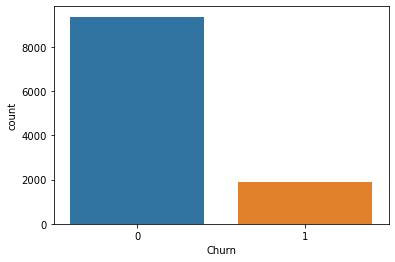

In [386]:
sns.countplot(churn["Churn"]);

In [387]:
# This data is highly imbalanced. 16% churn while 83% do not churn.

## Feature City Tier

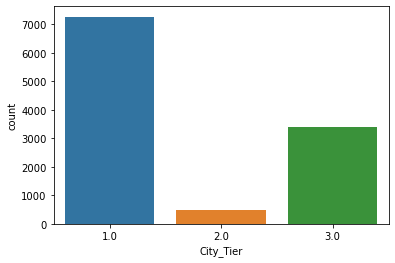

In [388]:
sns.countplot(churn["City_Tier"]);

In [389]:
# Most of the customers belong to City_Tier1. City_tier 2 has least customers

## Feature Payment

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Debit Card'),
  Text(1, 0, 'UPI'),
  Text(2, 0, 'Credit Card'),
  Text(3, 0, 'Cash on Delivery'),
  Text(4, 0, 'E wallet')])

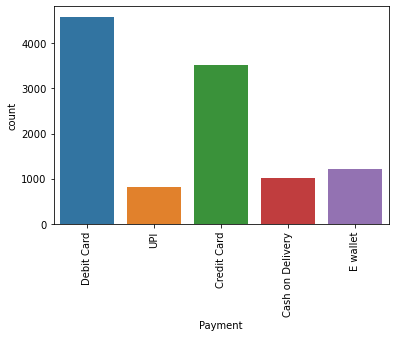

In [390]:
sns.countplot(churn["Payment"]);
plt.xticks(rotation= 90)

## Feature Gender

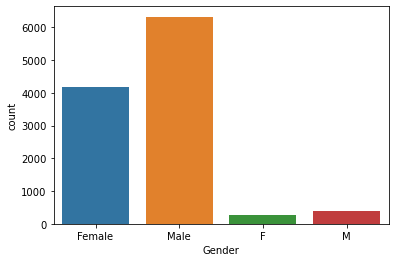

In [391]:
sns.countplot(churn["Gender"]);

## Feature Account_user_count

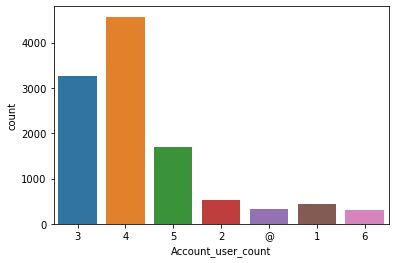

In [392]:
sns.countplot(churn["Account_user_count"]);

## Feature Service_Score

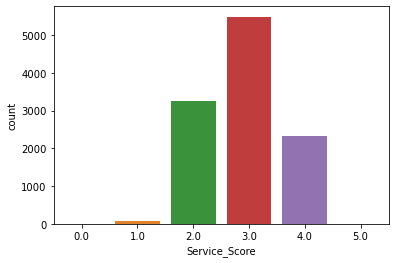

In [393]:
sns.countplot(churn["Service_Score"]);

## Feature account_segment

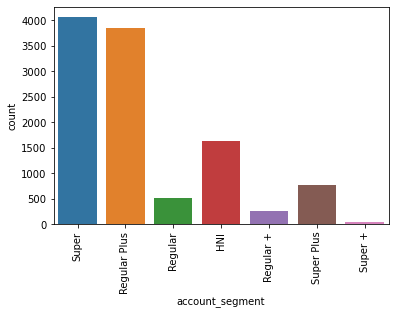

In [394]:
sns.countplot(churn["account_segment"]);
plt.xticks(rotation=90)
plt.show()

## Feature CC_Agent_Score

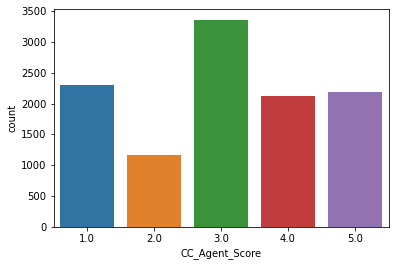

In [395]:
sns.countplot(churn["CC_Agent_Score"]);

## Feature Marital_Status

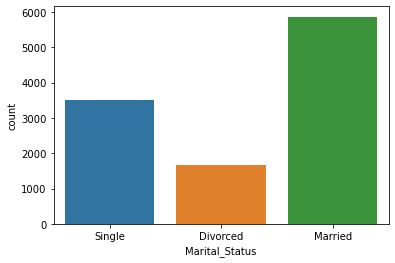

In [396]:
sns.countplot(churn["Marital_Status"]);

## Feature Complain_ly

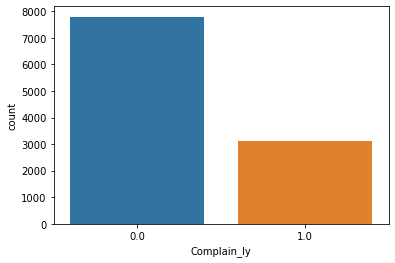

In [397]:
sns.countplot(churn["Complain_ly"]);

## Feature Login Device

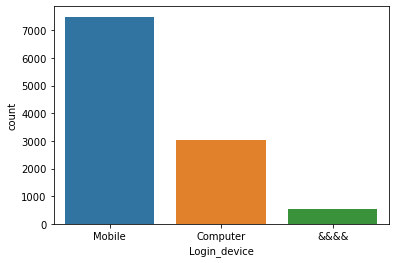

In [398]:
sns.countplot(churn["Login_device"]);

## Bi-Variate and multi variate analysis

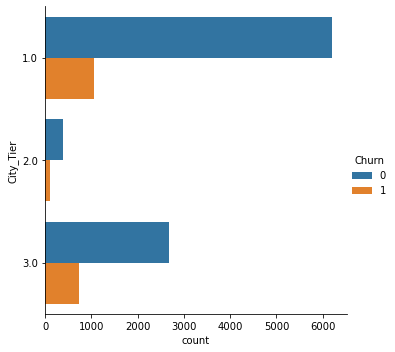

In [399]:
sns.catplot(y="City_Tier", hue="Churn", kind="count", data=churn)

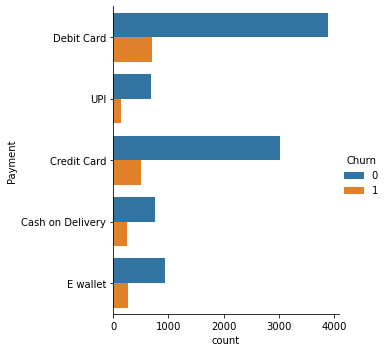

In [400]:
sns.catplot(y="Payment", hue="Churn", kind="count", data=churn)

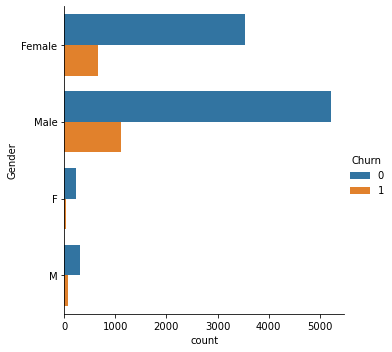

In [401]:
sns.catplot(y="Gender", hue="Churn", kind="count", data=churn)

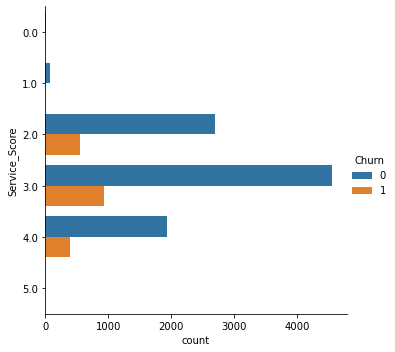

In [402]:
sns.catplot(y="Service_Score", hue="Churn", kind="count", data=churn)

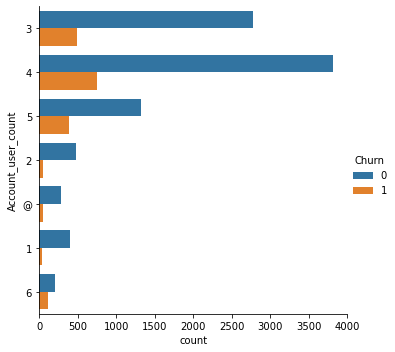

In [403]:
sns.catplot(y="Account_user_count", hue="Churn", kind="count", data=churn)

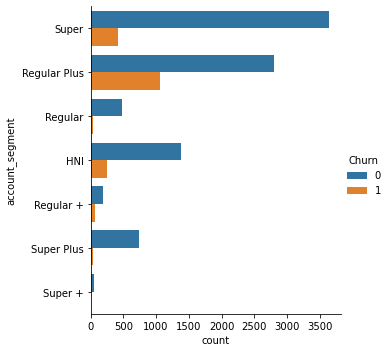

In [404]:
sns.catplot(y="account_segment", hue="Churn", kind="count", data=churn)

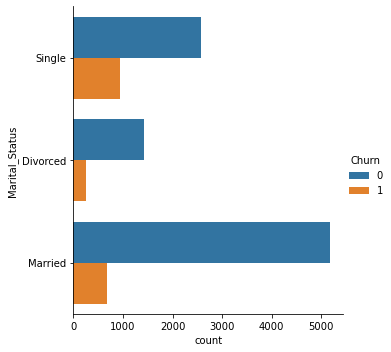

In [405]:
sns.catplot(y="Marital_Status", hue="Churn", kind="count", data=churn)

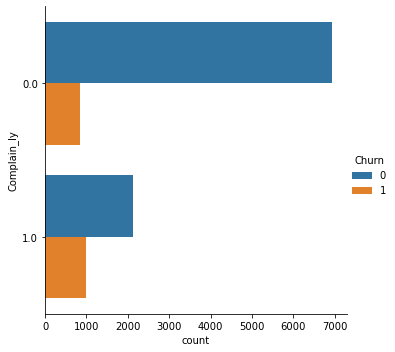

In [406]:
sns.catplot(y="Complain_ly", hue="Churn", kind="count", data=churn)

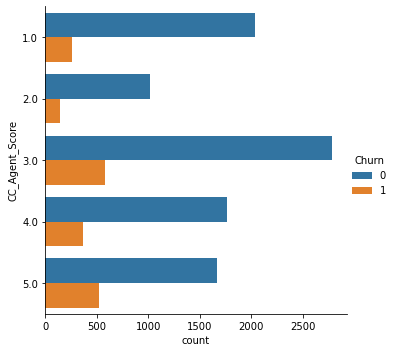

In [407]:
sns.catplot(y="CC_Agent_Score", hue="Churn", kind="count", data=churn)

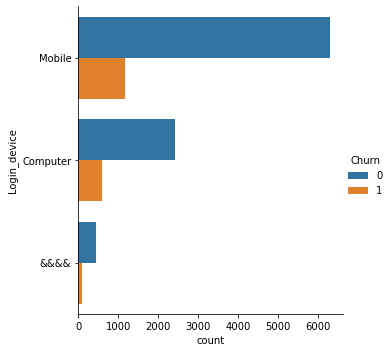

In [408]:
sns.catplot(y="Login_device", hue="Churn", kind="count", data=churn)

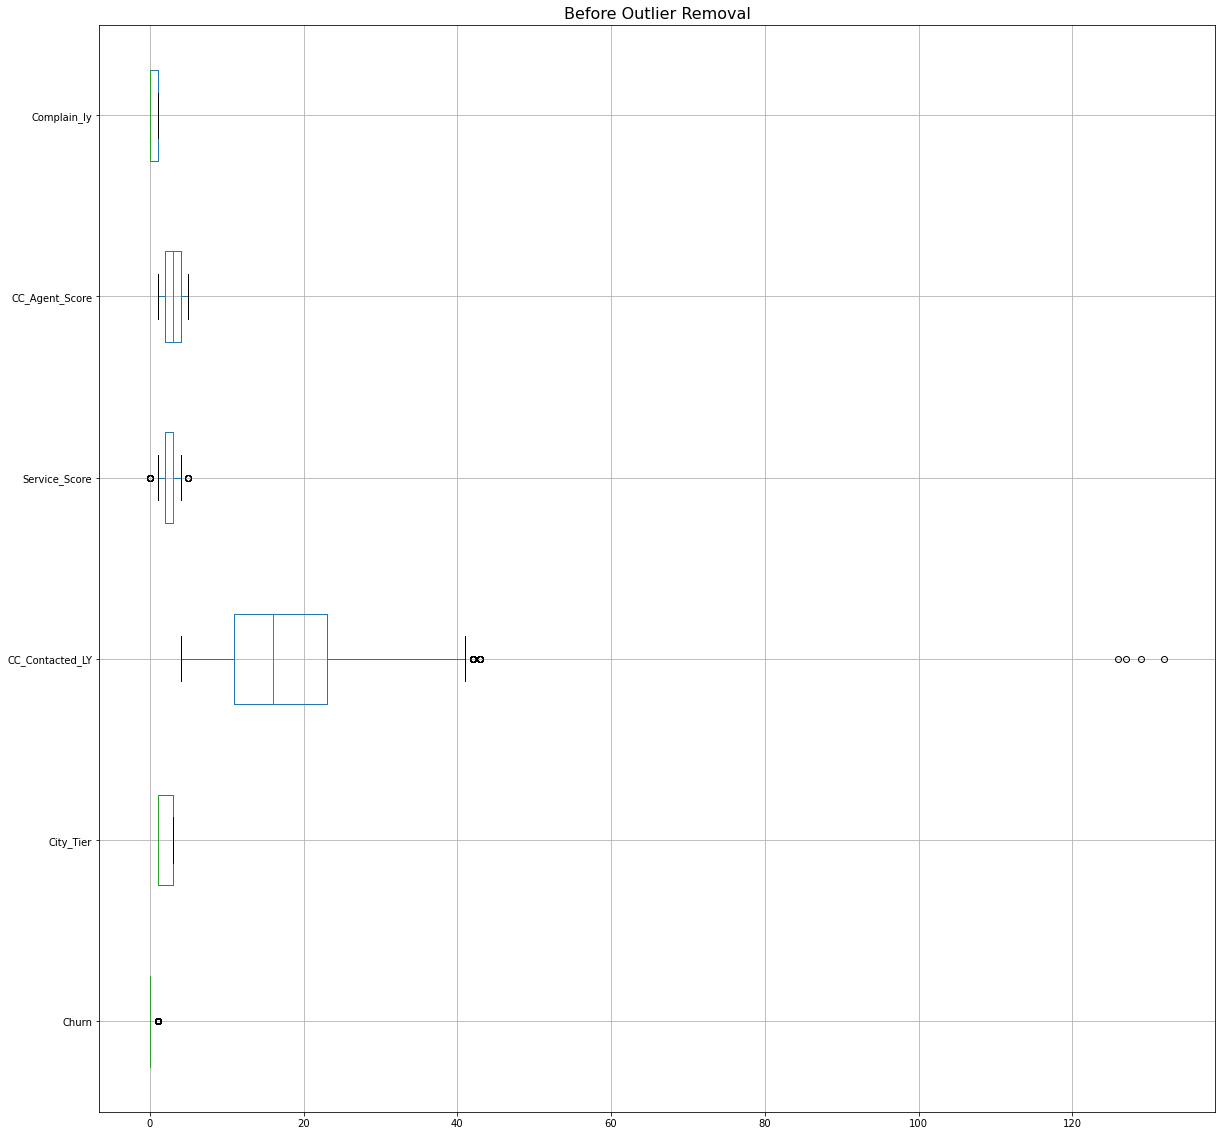

In [409]:
plt.figure(figsize=(20,20))
churn.boxplot(vert=0)
plt.title('Before Outlier Removal',fontsize=16)
plt.show()


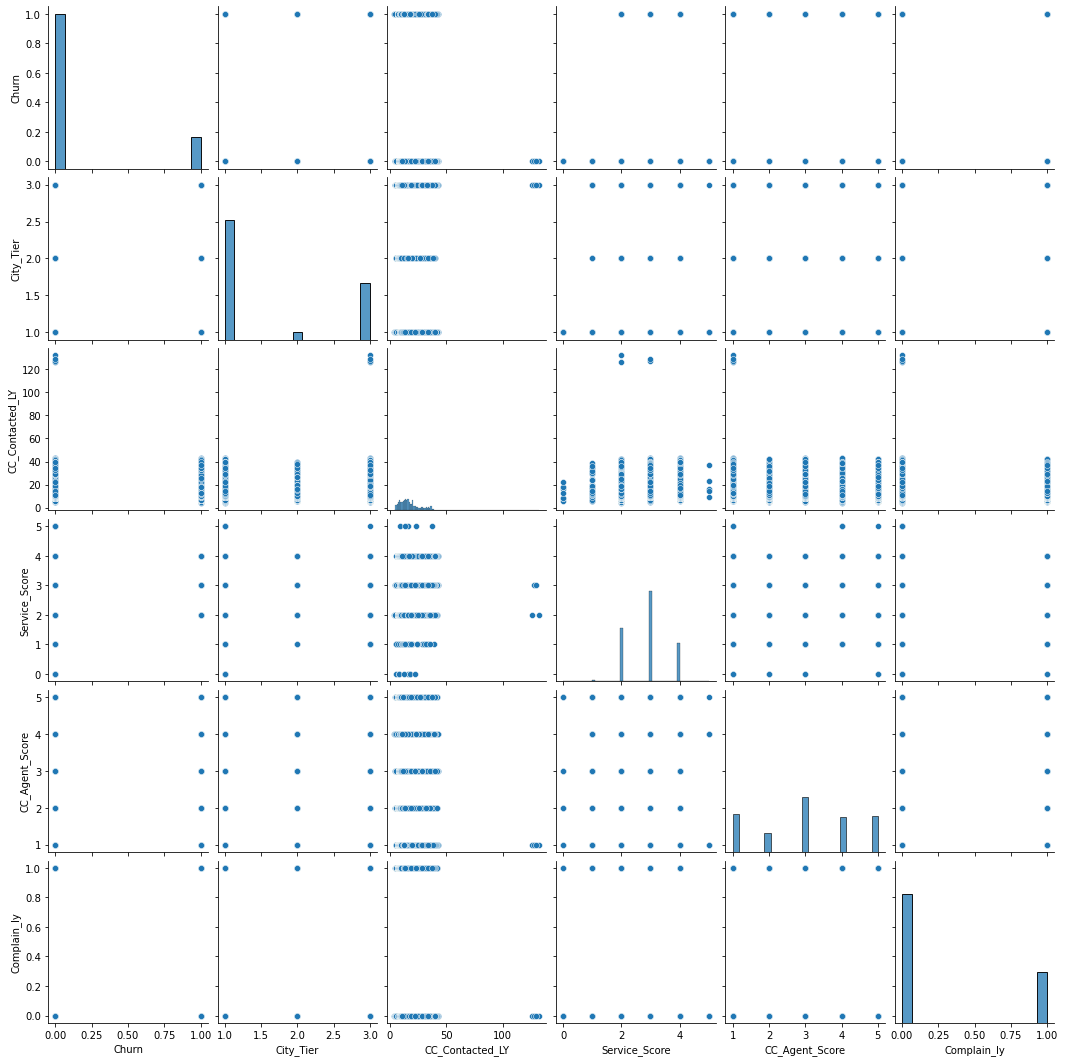

In [410]:
#the pair plot:-
sns.pairplot(data = churn)
plt.show()

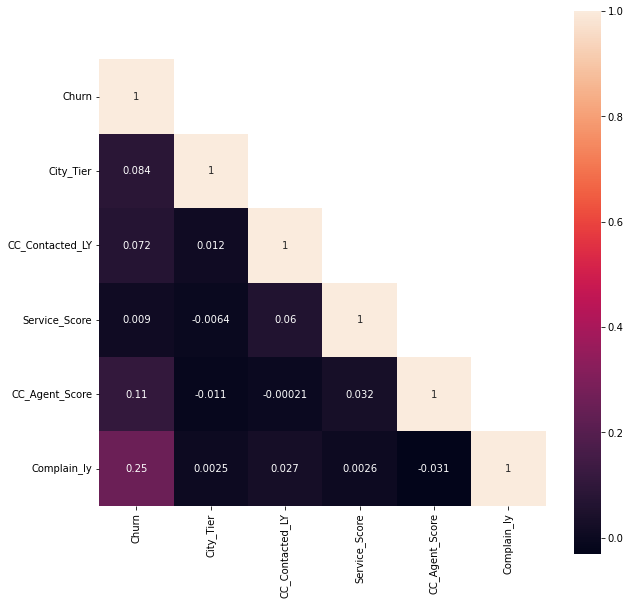

In [411]:
# plotting heatmap of correlation
cor = churn.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask, vmax=1, square=True, annot=True)
plt.show()


In [412]:
# lets check the percentage of outlier in each column
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((churn < (Q1 - 1.5 * IQR)) | (churn > (Q3 + 1.5 * IQR))).sum()/churn.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

outlier %
Account_user_count            0.00
CC_Agent_Score                0.00
CC_Contacted_LY               0.37
Churn                        16.84
City_Tier                     0.00
Complain_ly                   0.00
Day_Since_CC_connect          0.00
Gender                        0.00
Login_device                  0.00
Marital_Status                0.00
Payment                       0.00
Service_Score                 0.12
Tenure                        0.00
account_segment               0.00
cashback                      0.00
coupon_used_for_payment       0.00
rev_growth_yoy                0.00
rev_per_month                 0.00

## CLEANING THE MESSY DATA

## Treating the variable "Tenure"

In [413]:
churn['Tenure'] = churn['Tenure'].replace('#',np.NaN)

In [414]:
churn['Tenure'] = churn['Tenure'].astype('Int64')

In [415]:
churn['Tenure'].unique()

<IntegerArray>
[   4,    0,    2,   13,   11, <NA>,    9,   99,   19,   20,   14,    8,   26,
   18,    5,   30,    7,    1,   23,    3,   29,    6,   28,   24,   25,   16,
   10,   15,   22,   27,   12,   21,   17,   50,   60,   31,   51,   61]
Length: 38, dtype: Int64

In [416]:
## Treating the variable CC_Contacted_LY

In [417]:
churn["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [418]:
churn["CC_Contacted_LY"].value_counts()

14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0     178
34.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
127.0      1
126.0      1
132.0      1
4.0        1
129.0      1
Name: CC_Contacted_LY, dtype: int64

## Treating the variable "Account_user_count"

In [419]:
churn["Account_user_count"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [420]:
churn["Account_user_count"].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [421]:
churn['Account_user_count'] = churn['Account_user_count'].replace('@',np.NaN)

In [422]:
churn["Account_user_count"].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [423]:
churn['Account_user_count'] = churn['Account_user_count'].astype('float64')

## Treating the variable 'rev_per_month'

In [424]:
churn["rev_per_month"].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [425]:
churn['rev_per_month'] = churn['rev_per_month'].replace('+',np.NaN)

In [426]:
churn['rev_per_month'] = churn['rev_per_month'].astype('float64')

In [427]:
churn["rev_per_month"].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

## Treating the variable 'rev_growth_yoy'

In [428]:
churn["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [429]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].replace('$',np.NaN)

In [430]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].astype('float64')

## Treating the variable 'Day_Since_CC_connect'

In [431]:
churn.Day_Since_CC_connect.unique() 

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [432]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].replace('$',np.NaN)

In [433]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].astype('float64')

In [434]:
churn.Day_Since_CC_connect.unique() 

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

## Treating the variable "cashback"

In [435]:
churn["cashback"].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [436]:
churn['cashback'] = churn['cashback'].replace('$',np.NaN)

In [437]:
churn['cashback'] = churn['cashback'].astype('float64')

In [438]:
churn["cashback"].unique()

array([159.93, 120.9 ,    nan, ..., 227.36, 226.91, 191.42])

## Treating the variable "coupon_used_for_payment"

In [439]:
churn["coupon_used_for_payment"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [440]:
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('#',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('$',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('*',np.NaN)

In [441]:
churn['City_Tier'] = churn['City_Tier'].astype('Int64')

In [442]:
churn["coupon_used_for_payment"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

## Treating the variable "City_Tier"

In [443]:
churn["City_Tier"].unique()

<IntegerArray>
[3, 1, <NA>, 2]
Length: 4, dtype: Int64

In [444]:
churn['City_Tier'] = churn['City_Tier'].fillna(churn['City_Tier'].mode()[0])

In [445]:
churn["City_Tier"].unique()

<IntegerArray>
[3, 1, 2]
Length: 3, dtype: Int64

In [446]:
churn['City_Tier'] = churn['City_Tier'].astype('Int64')

## Treating the variable "CC_Contacted_LY"

In [447]:
churn["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [448]:
churn["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [449]:
churn['CC_Contacted_LY'] = churn['CC_Contacted_LY'].astype('Int64')

## Treating the variable "Payment"

In [450]:
churn["Payment"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [451]:
churn['Payment'] = churn['Payment'].fillna(churn['Payment'].mode()[0])

In [452]:
churn['Payment'] = churn['Payment'].replace('Debit Card','1')
churn['Payment'] = churn['Payment'].replace('UPI','2')
churn['Payment'] = churn['Payment'].replace('Credit Card','3')
churn['Payment'] = churn['Payment'].replace('Cash on Delivery','4')
churn['Payment'] = churn['Payment'].replace('E wallet','5')

In [453]:
churn['Payment'] = churn['Payment'].astype('Int64')

In [454]:
churn["Payment"].unique()

<IntegerArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: Int64

## Treating the variable "Gender"

In [455]:
churn["Gender"].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [456]:
churn['Gender'] = churn['Gender'].replace('Female','1')
churn['Gender'] = churn['Gender'].replace('F','1')
churn['Gender'] = churn['Gender'].replace('Male','2')
churn['Gender'] = churn['Gender'].replace('M','2')

In [457]:
churn['Gender'] = churn['Gender'].fillna(churn['Gender'].mode()[0])

In [458]:
churn['Gender'] = churn['Gender'].astype('int64')

In [459]:
churn["Gender"].unique()

array([1, 2], dtype=int64)

## Treating the variable "Service_Score"

In [460]:
churn["Service_Score"].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [461]:
churn['Service_Score'] = churn['Service_Score'].fillna(churn['Service_Score'].mode()[0])

In [462]:
churn["Service_Score"].unique()

array([3., 2., 1., 0., 4., 5.])

In [463]:
churn['Service_Score'] = churn['Service_Score'].astype('int64')

In [464]:
churn["Service_Score"].unique()

array([3, 2, 1, 0, 4, 5], dtype=int64)

## Treating the variable "account_segment"

In [465]:
churn["account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [466]:
churn['account_segment'] = churn['account_segment'].replace('HNI','1')
churn['account_segment'] = churn['account_segment'].replace('Super Plus','2')
churn['account_segment'] = churn['account_segment'].replace('Super +','2')
churn['account_segment'] = churn['account_segment'].replace('Super','3')
churn['account_segment'] = churn['account_segment'].replace('Regular Plus','4')
churn['account_segment'] = churn['account_segment'].replace('Regular +','4')
churn['account_segment'] = churn['account_segment'].replace('Regular','5')



In [467]:
churn["account_segment"].unique()

array(['3', '4', '5', '1', nan, '2'], dtype=object)

In [468]:
churn['account_segment'] = churn['account_segment'].fillna(churn['account_segment'].mode()[0])

In [469]:
churn['account_segment'] = churn['account_segment'].astype('int64')

In [470]:
churn["account_segment"].unique()

array([3, 4, 5, 1, 2], dtype=int64)

## Treating the variable "CC_Agent_Score"

In [471]:
churn["CC_Agent_Score"].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [472]:
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].fillna(churn['CC_Agent_Score'].mode()[0])

In [473]:
churn["CC_Agent_Score"].unique()

array([2., 3., 5., 4., 1.])

In [474]:
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].astype('int64')

In [475]:
churn["CC_Agent_Score"].unique()

array([2, 3, 5, 4, 1], dtype=int64)

## Treating the variable "Marital_Status"

In [476]:
churn["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [477]:
churn['Marital_Status'] = churn['Marital_Status'].fillna(churn['Marital_Status'].mode()[0])

In [478]:
churn['Marital_Status'] = churn['Marital_Status'].replace('Single','1')
churn['Marital_Status'] = churn['Marital_Status'].replace('Divorced','3')
churn['Marital_Status'] = churn['Marital_Status'].replace('Married','2')

In [479]:
churn['Marital_Status'] = churn['Marital_Status'].astype('int64')

In [480]:
churn["Marital_Status"].unique()

array([1, 3, 2], dtype=int64)

## Treating the variable "Complain_ly"

In [481]:
churn["Complain_ly"].unique()

array([ 1.,  0., nan])

In [482]:
churn['Complain_ly'] = churn['Complain_ly'].fillna(churn['Complain_ly'].mode()[0])

In [483]:
churn['Complain_ly'] = churn['Complain_ly'].astype('int64')

In [484]:
churn["Complain_ly"].unique()

array([1, 0], dtype=int64)

## Treating the variable "Login_device"

In [485]:
churn["Login_device"].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [486]:
churn['Login_device'] = churn['Login_device'].replace('&&&&',np.NaN)

In [487]:
churn['Login_device'] = churn['Login_device'].fillna(churn['Login_device'].mode()[0])

In [488]:
churn['Login_device'] = churn['Login_device'].replace('Mobile','1')
churn['Login_device'] = churn['Login_device'].replace('Computer','2')

In [489]:
churn['Login_device'] = churn['Login_device'].astype('int64')

In [490]:
churn["Login_device"].unique()

array([1, 2], dtype=int64)

## Information of clean data

## Impute Missing Values

In [491]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
churn_df_imputed= pd.DataFrame(imputer.fit_transform(churn), columns =churn.columns)


In [492]:
churn_df_imputed

Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
0        1.0     4.0        3.0              6.0      1.0     1.0   
1        1.0     0.0        1.0              8.0      2.0     2.0   
2        1.0     0.0        1.0             30.0      1.0     2.0   
3        1.0     0.0        3.0             15.0      1.0     2.0   
4        1.0     0.0        1.0             12.0      3.0     2.0   
...      ...     ...        ...              ...      ...     ...   
11255    0.0    10.0        1.0             34.0      3.0     2.0   
11256    0.0    13.0        1.0             19.0      3.0     2.0   
11257    0.0     1.0        1.0             14.0      1.0     2.0   
11258    0.0    23.0        3.0             11.0      3.0     2.0   
11259    0.0     8.0        1.0             22.0      3.0     2.0   

       Service_Score  Account_user_count  account_segment  CC_Agent_Score  \
0                3.0                 3.0              3.0             2.0   
1                3.0                 4.0              4.0             3.0   
2                2.0                 4.0              4.0             3.0   
3                2.0                 4.0              3.0             5.0   
4                2.0                 3.0              4.0             5.0   
...              ...                 ...              ...             ...   
11255            3.0                 2.0              3.0             1.0   
11256            3.0                 5.0              1.0             5.0   
11257            3.0                 2.0              3.0             4.0   
11258            4.0                 5.0              3.0             4.0   
11259            3.0                 2.0              3.0             3.0   

       Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0                 1.0            9.0          1.0            11.0   
1                 1.0            7.0          1.0            15.0   
2                 1.0            6.0          1.0            14.0   
3                 1.0            8.0          0.0            23.0   
4                 1.0            3.0          0.0            11.0   
...               ...            ...          ...             ...   
11255             2.0            9.0          0.0            19.0   
11256             2.0            7.0          0.0            16.0   
11257             2.0            7.0          1.0            22.0   
11258             2.0            7.0          0.0            16.0   
11259             2.0            5.0          0.0            13.0   

       coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  
0                          1.0                   5.0   159.930           1.0  
1                          0.0                   0.0   120.900           1.0  
2                          0.0                   3.0   148.523           1.0  
3                          0.0                   3.0   134.070           1.0  
4                          1.0                   3.0   129.600           1.0  
...                        ...                   ...       ...           ...  
11255                      1.0                   4.0   153.710           2.0  
11256                      1.0                   8.0   226.910           1.0  
11257                      1.0                   4.0   191.420           1.0  
11258                      2.0                   9.0   179.900           2.0  
11259                      2.0                   3.0   175.040           1.0  

[11260 rows x 18 columns]

In [493]:
churn_df_imputed.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [494]:
churn_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  float64
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  float64
 5   Gender                   11260 non-null  float64
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  float64
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  float64
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

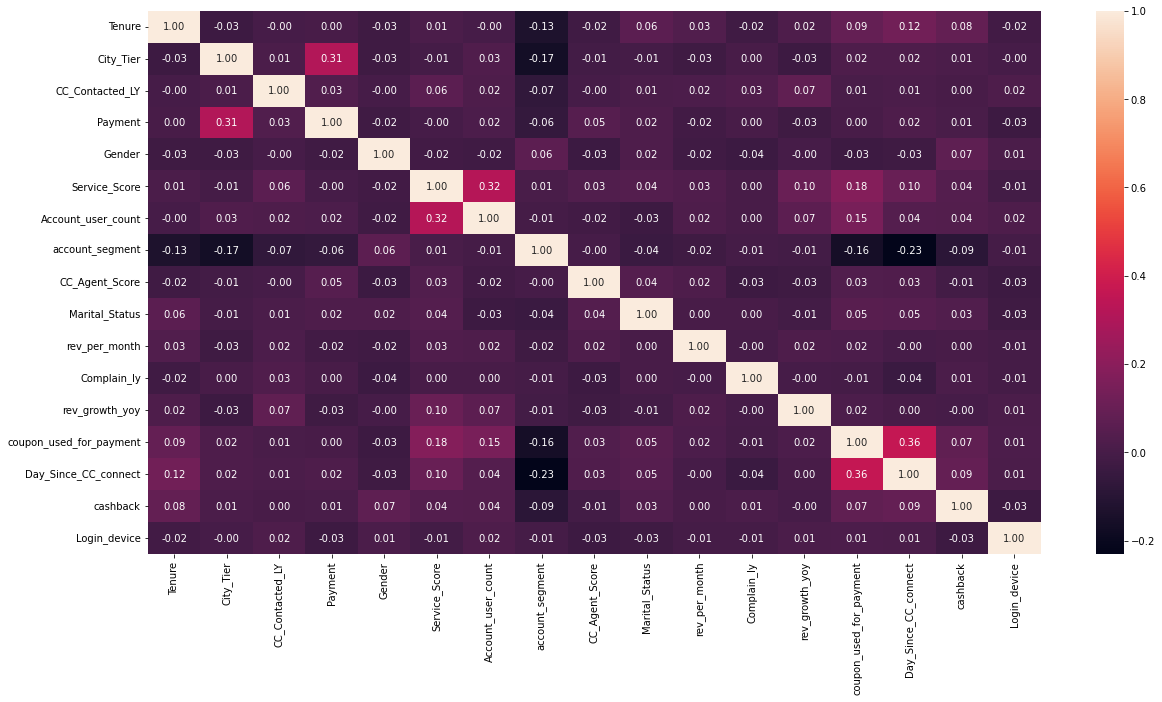

In [495]:


plt.figure(figsize=(20,10))
sns.heatmap(churn_df_imputed.drop('Churn', axis = 1).corr(), annot=True, fmt='.2f')
plt.show()


## Percentage of outlier

In [496]:
# lets check the percentage of outlier in each column
Q1 = churn_df_imputed.quantile(0.25)
Q3 = churn_df_imputed.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((churn_df_imputed < (Q1 - 1.5 * IQR)) | (churn_df_imputed > (Q3 + 1.5 * IQR))).sum()/churn_df_imputed.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

outlier %
Churn                        16.84
Tenure                        1.23
City_Tier                     0.00
CC_Contacted_LY               0.37
Payment                       0.00
Gender                        0.00
Service_Score                 0.12
Account_user_count            6.76
account_segment              14.56
CC_Agent_Score                0.00
Marital_Status                0.00
rev_per_month                 2.10
Complain_ly                   0.00
rev_growth_yoy                0.00
coupon_used_for_payment      12.26
Day_Since_CC_connect          1.16
cashback                      8.20
Login_device                  0.00

In [497]:
# checking info of data
churn_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  float64
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  float64
 5   Gender                   11260 non-null  float64
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  float64
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  float64
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

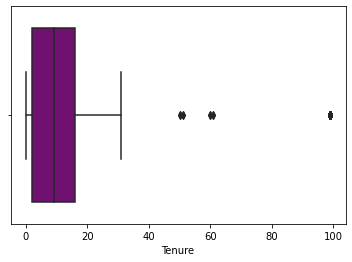

In [498]:
sns.boxplot(churn_df_imputed['Tenure'], color= "purple")
plt.show()


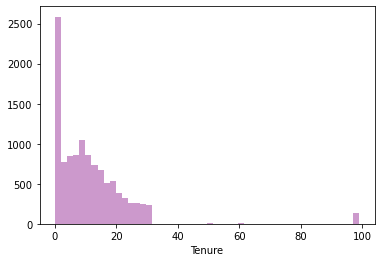

In [499]:
sns.distplot(churn_df_imputed['Tenure'], kde=False, color='purple');
plt.show()

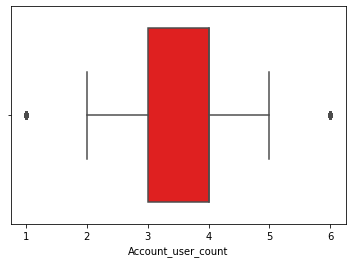

In [500]:
sns.boxplot(churn_df_imputed['Account_user_count'], color= "red")
plt.show()

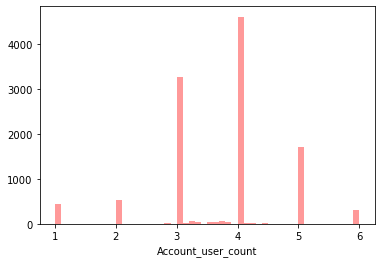

In [501]:
sns.distplot(churn_df_imputed['Account_user_count'], kde=False, color='red');
plt.show()

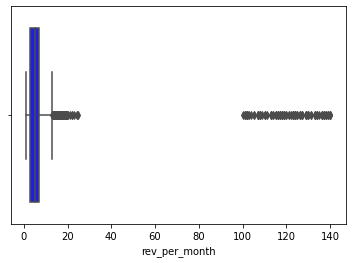

In [502]:
sns.boxplot(churn_df_imputed['rev_per_month'], color= "blue")
plt.show()

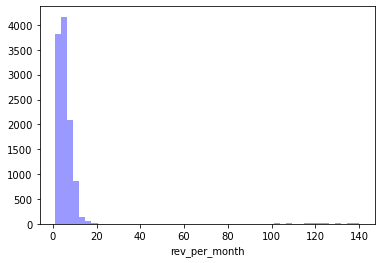

In [503]:
sns.distplot(churn_df_imputed['rev_per_month'], kde=False, color='blue');
plt.show()

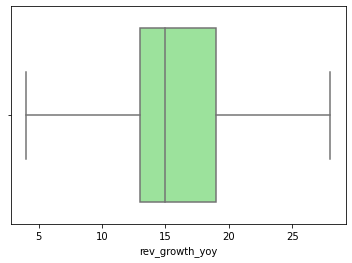

In [504]:
sns.boxplot(churn_df_imputed['rev_growth_yoy'], color= "lightgreen")
plt.show()

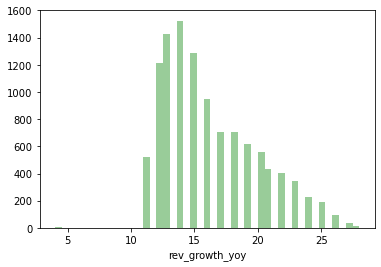

In [505]:
sns.distplot(churn_df_imputed['rev_growth_yoy'], kde=False, color='g');
plt.show()

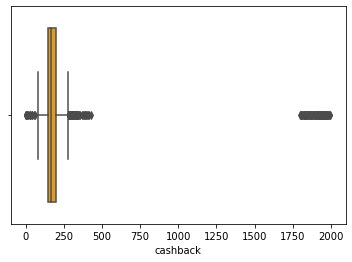

In [506]:
sns.boxplot(churn_df_imputed['cashback'], color= "orange")
plt.show()

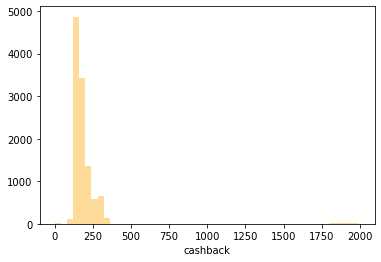

In [507]:
sns.distplot(churn_df_imputed['cashback'], kde=False, color='orange');
plt.show()

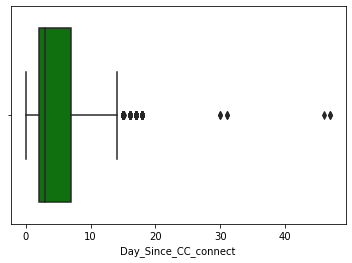

In [508]:
sns.boxplot(churn_df_imputed['Day_Since_CC_connect'], color= "green")
plt.show()


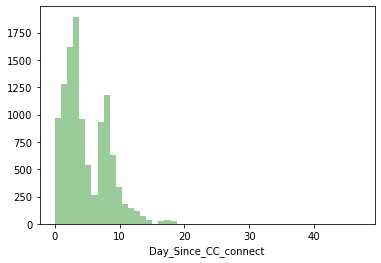

In [509]:
sns.distplot(churn_df_imputed['Day_Since_CC_connect'], kde=False, color='green');
plt.show()

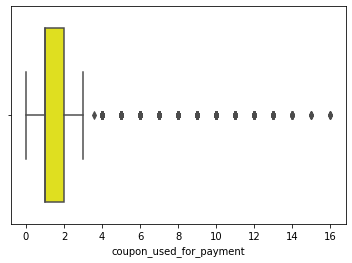

In [510]:
sns.boxplot(churn_df_imputed['coupon_used_for_payment'], color= "yellow")
plt.show()


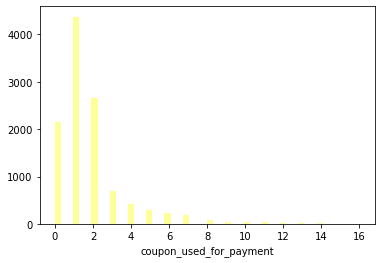

In [511]:
sns.distplot(churn_df_imputed['coupon_used_for_payment'], kde=False, color='yellow');
plt.show()

## Treatment of Outlier

In [512]:
#treating outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [513]:
lw,up=remove_outlier(churn_df_imputed['Tenure'])
churn_df_imputed['Tenure']=np.where(churn_df_imputed['Tenure']>up,up,churn_df_imputed['Tenure'])
churn_df_imputed['Tenure']=np.where(churn_df_imputed['Tenure']<lw,lw,churn_df_imputed['Tenure'])

lw,up=remove_outlier(churn_df_imputed['CC_Contacted_LY'])
churn_df_imputed['CC_Contacted_LY']=np.where(churn_df_imputed['CC_Contacted_LY']>up,up,churn_df_imputed['CC_Contacted_LY'])
churn_df_imputed['CC_Contacted_LY']=np.where(churn_df_imputed['CC_Contacted_LY']<lw,lw,churn_df_imputed['CC_Contacted_LY'])

lw,up=remove_outlier(churn_df_imputed['Account_user_count'])
churn_df_imputed['Account_user_count']=np.where(churn_df_imputed['Account_user_count']>up,up,churn_df_imputed['Account_user_count'])
churn_df_imputed['Account_user_count']=np.where(churn_df_imputed['Account_user_count']<lw,lw,churn_df_imputed['Account_user_count'])

lw,up=remove_outlier(churn_df_imputed['cashback'])
churn_df_imputed['cashback']=np.where(churn_df_imputed['cashback']>up,up,churn_df_imputed['cashback'])
churn_df_imputed['cashback']=np.where(churn_df_imputed['cashback']<lw,lw,churn_df_imputed['cashback'])

lw,up=remove_outlier(churn_df_imputed['rev_per_month'])
churn_df_imputed['rev_per_month']=np.where(churn_df_imputed['rev_per_month']>up,up,churn_df_imputed['rev_per_month'])
churn_df_imputed['rev_per_month']=np.where(churn_df_imputed['rev_per_month']<lw,lw,churn_df_imputed['rev_per_month'])

lw,up=remove_outlier(churn['Day_Since_CC_connect'])
churn_df_imputed['Day_Since_CC_connect']=np.where(churn_df_imputed['Day_Since_CC_connect']>up,up,churn_df_imputed['Day_Since_CC_connect'])
churn_df_imputed['Day_Since_CC_connect']=np.where(churn_df_imputed['Day_Since_CC_connect']<lw,lw,churn_df_imputed['Day_Since_CC_connect'])

lw,up=remove_outlier(churn['coupon_used_for_payment'])
churn_df_imputed['coupon_used_for_payment']=np.where(churn_df_imputed['coupon_used_for_payment']>up,up,churn_df_imputed['coupon_used_for_payment'])
churn_df_imputed['coupon_used_for_payment']=np.where(churn_df_imputed['coupon_used_for_payment']<lw,lw,churn_df_imputed['coupon_used_for_payment'])

lw,up=remove_outlier(churn['rev_growth_yoy'])
churn_df_imputed['rev_growth_yoy']=np.where(churn_df_imputed['rev_growth_yoy']>up,up,churn_df_imputed['rev_growth_yoy'])
churn_df_imputed['rev_growth_yoy']=np.where(churn_df_imputed['rev_growth_yoy']<lw,lw,churn_df_imputed['rev_growth_yoy'])

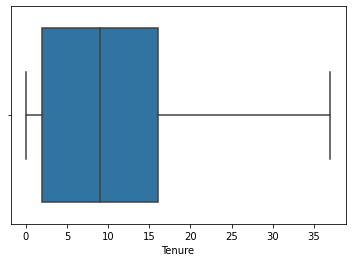

In [514]:
sns.boxplot(churn_df_imputed['Tenure'])
plt.show()

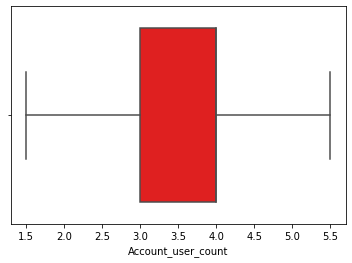

In [515]:
sns.boxplot(churn_df_imputed['Account_user_count'], color= "red")
plt.show()

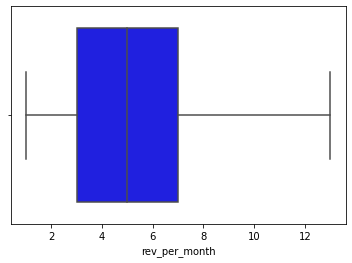

In [516]:
sns.boxplot(churn_df_imputed['rev_per_month'], color= "blue")
plt.show()

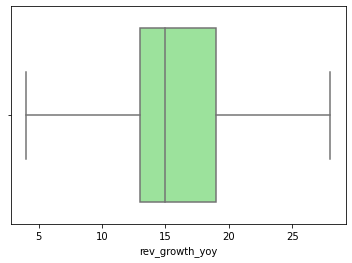

In [517]:
sns.boxplot(churn_df_imputed['rev_growth_yoy'], color= "lightgreen")
plt.show()

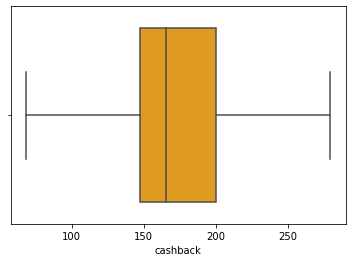

In [518]:
sns.boxplot(churn_df_imputed['cashback'], color= "orange")
plt.show()

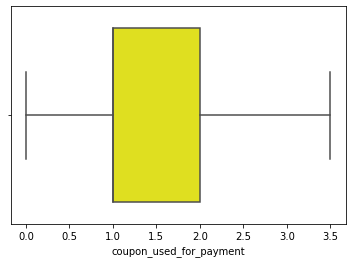

In [519]:
sns.boxplot(churn_df_imputed['coupon_used_for_payment'], color= "yellow")
plt.show()


<AxesSubplot:>

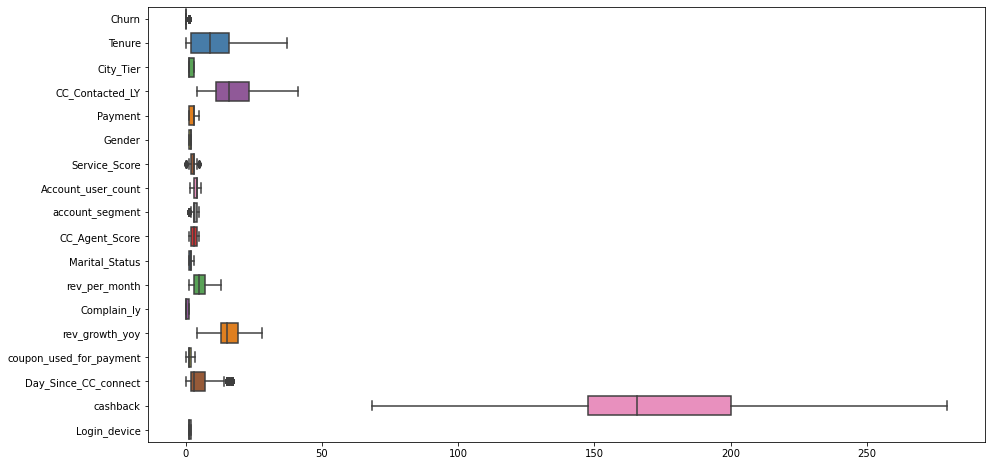

In [520]:
plt.figure(figsize=(15,8))
sns.boxplot(data=churn_df_imputed, orient="h", palette="Set1")

## Bivariate Analysis

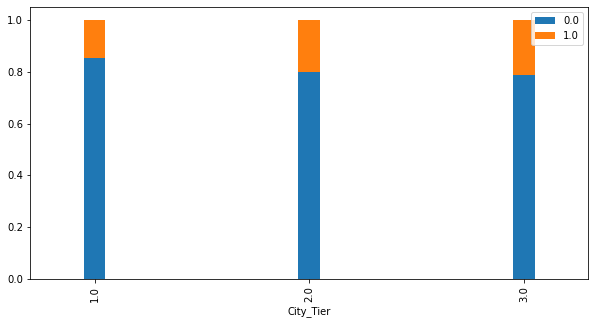

In [521]:

df= churn_df_imputed.groupby('City_Tier')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');


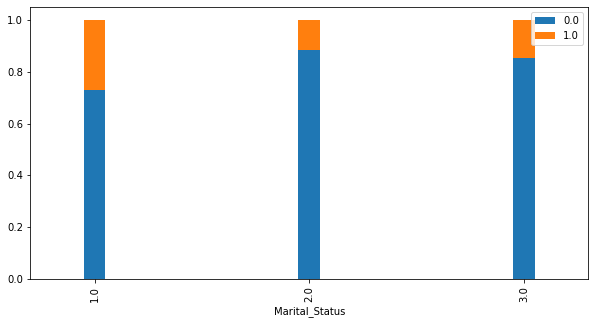

In [522]:
df= churn_df_imputed.groupby('Marital_Status')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');

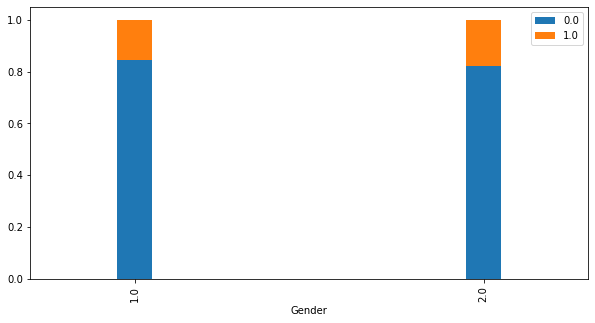

In [523]:
df= churn_df_imputed.groupby('Gender')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');

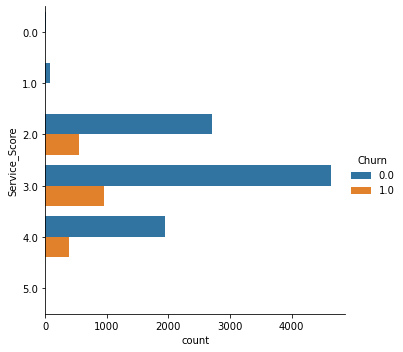

In [524]:
sns.catplot(y="Service_Score", hue="Churn", kind="count", data=churn_df_imputed)

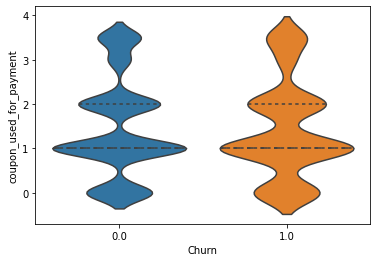

In [525]:
sns.violinplot(churn_df_imputed['Churn'],churn_df_imputed['coupon_used_for_payment'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

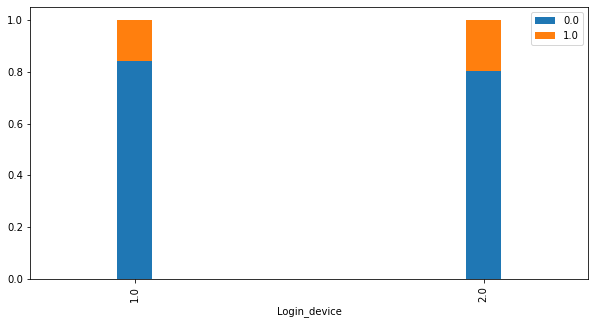

In [526]:
df= churn_df_imputed.groupby('Login_device')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');

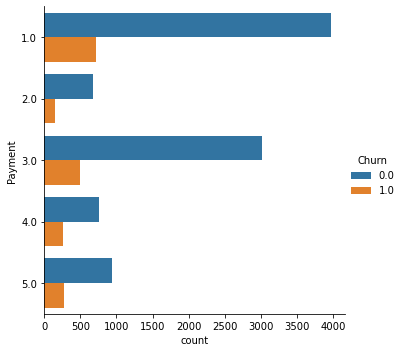

In [527]:
sns.catplot(y="Payment", hue="Churn", kind="count", data=churn_df_imputed)

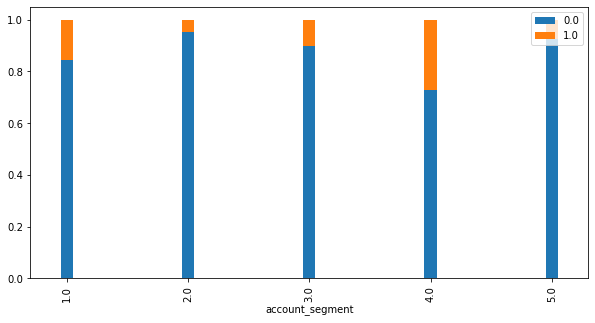

In [528]:
df= churn_df_imputed.groupby('account_segment')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');


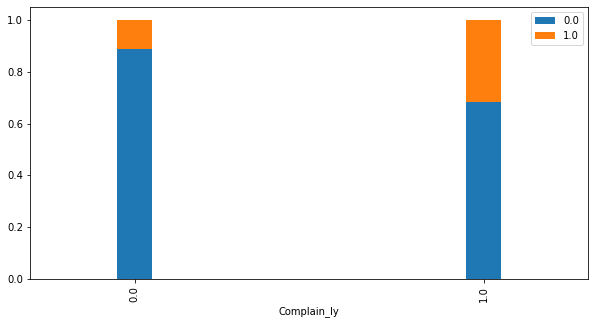

In [529]:
df= churn_df_imputed.groupby('Complain_ly')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');


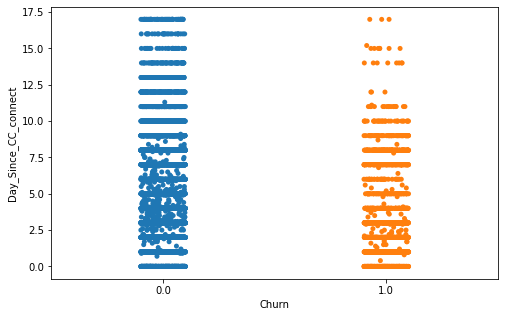

In [530]:
plt.figure(figsize=(8,5))
sns.stripplot(churn_df_imputed["Churn"], churn_df_imputed['Day_Since_CC_connect'], jitter=True) 
plt.show()


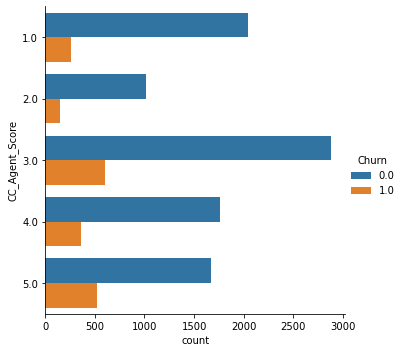

In [531]:
sns.catplot(y="CC_Agent_Score", hue="Churn", kind="count", data=churn_df_imputed)

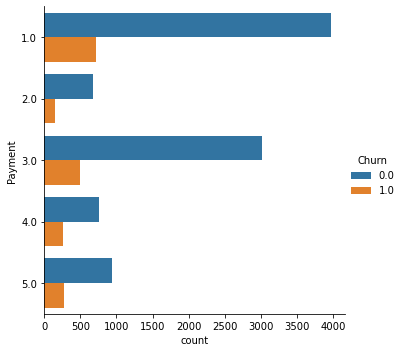

In [532]:
sns.catplot(y="Payment", hue="Churn", kind="count", data=churn_df_imputed)

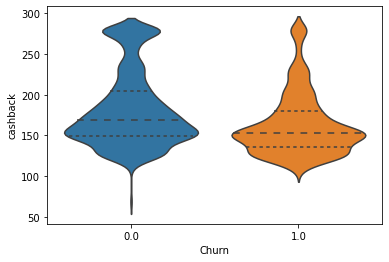

In [533]:
sns.violinplot(churn_df_imputed['Churn'],churn_df_imputed['cashback'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

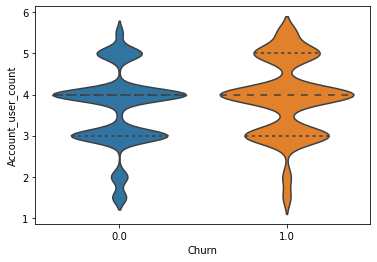

In [534]:

sns.violinplot(churn_df_imputed['Churn'],churn_df_imputed['Account_user_count'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

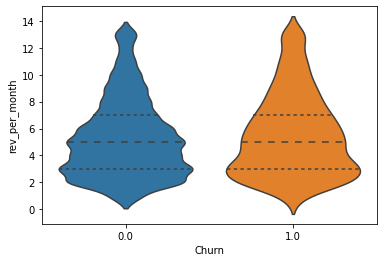

In [535]:
sns.violinplot(churn_df_imputed['Churn'],churn_df_imputed['rev_per_month'],inner='quartile',scale='width',orient='vertical',scale_hue=True);


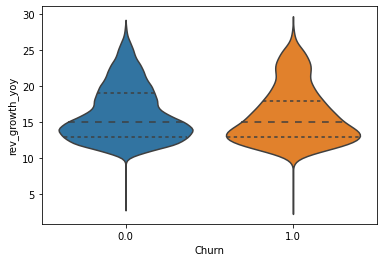

In [536]:
sns.violinplot(churn_df_imputed['Churn'],churn_df_imputed['rev_growth_yoy'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

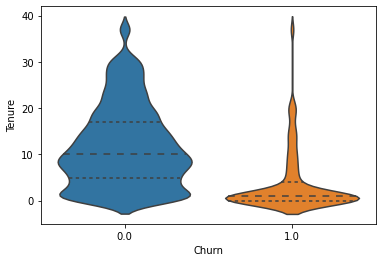

In [537]:
sns.violinplot(churn_df_imputed['Churn'],churn_df_imputed['Tenure'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

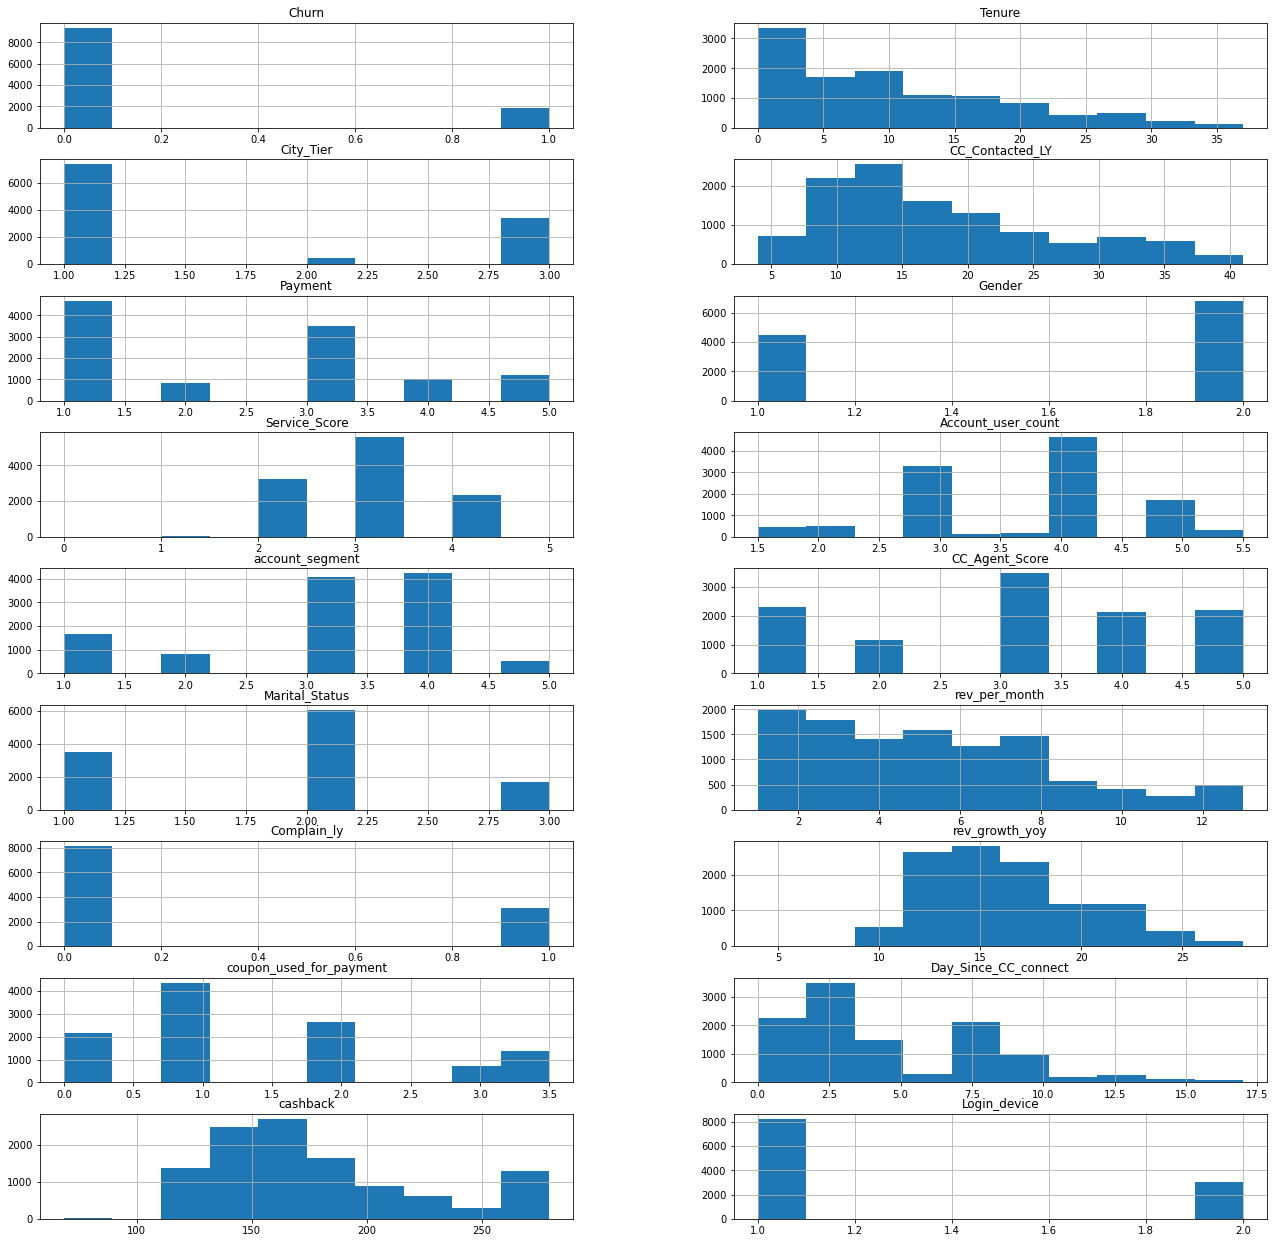

In [538]:
churn_df_imputed.hist(figsize=(22,22),layout=(9,2));

In [539]:

churn_df_imputed.head()

Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0    1.0     4.0        3.0              6.0      1.0     1.0            3.0   
1    1.0     0.0        1.0              8.0      2.0     2.0            3.0   
2    1.0     0.0        1.0             30.0      1.0     2.0            2.0   
3    1.0     0.0        3.0             15.0      1.0     2.0            2.0   
4    1.0     0.0        1.0             12.0      3.0     2.0            2.0   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0                 3.0              3.0             2.0             1.0   
1                 4.0              4.0             3.0             1.0   
2                 4.0              4.0             3.0             1.0   
3                 4.0              3.0             5.0             1.0   
4                 3.0              4.0             5.0             1.0   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0          1.0            11.0                      1.0   
1            7.0          1.0            15.0                      0.0   
2            6.0          1.0            14.0                      0.0   
3            8.0          0.0            23.0                      0.0   
4            3.0          0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Login_device  
0                   5.0   159.930           1.0  
1                   0.0   120.900           1.0  
2                   3.0   148.523           1.0  
3                   3.0   134.070           1.0  
4                   3.0   129.600           1.0

<Figure size 1584x1584 with 0 Axes>

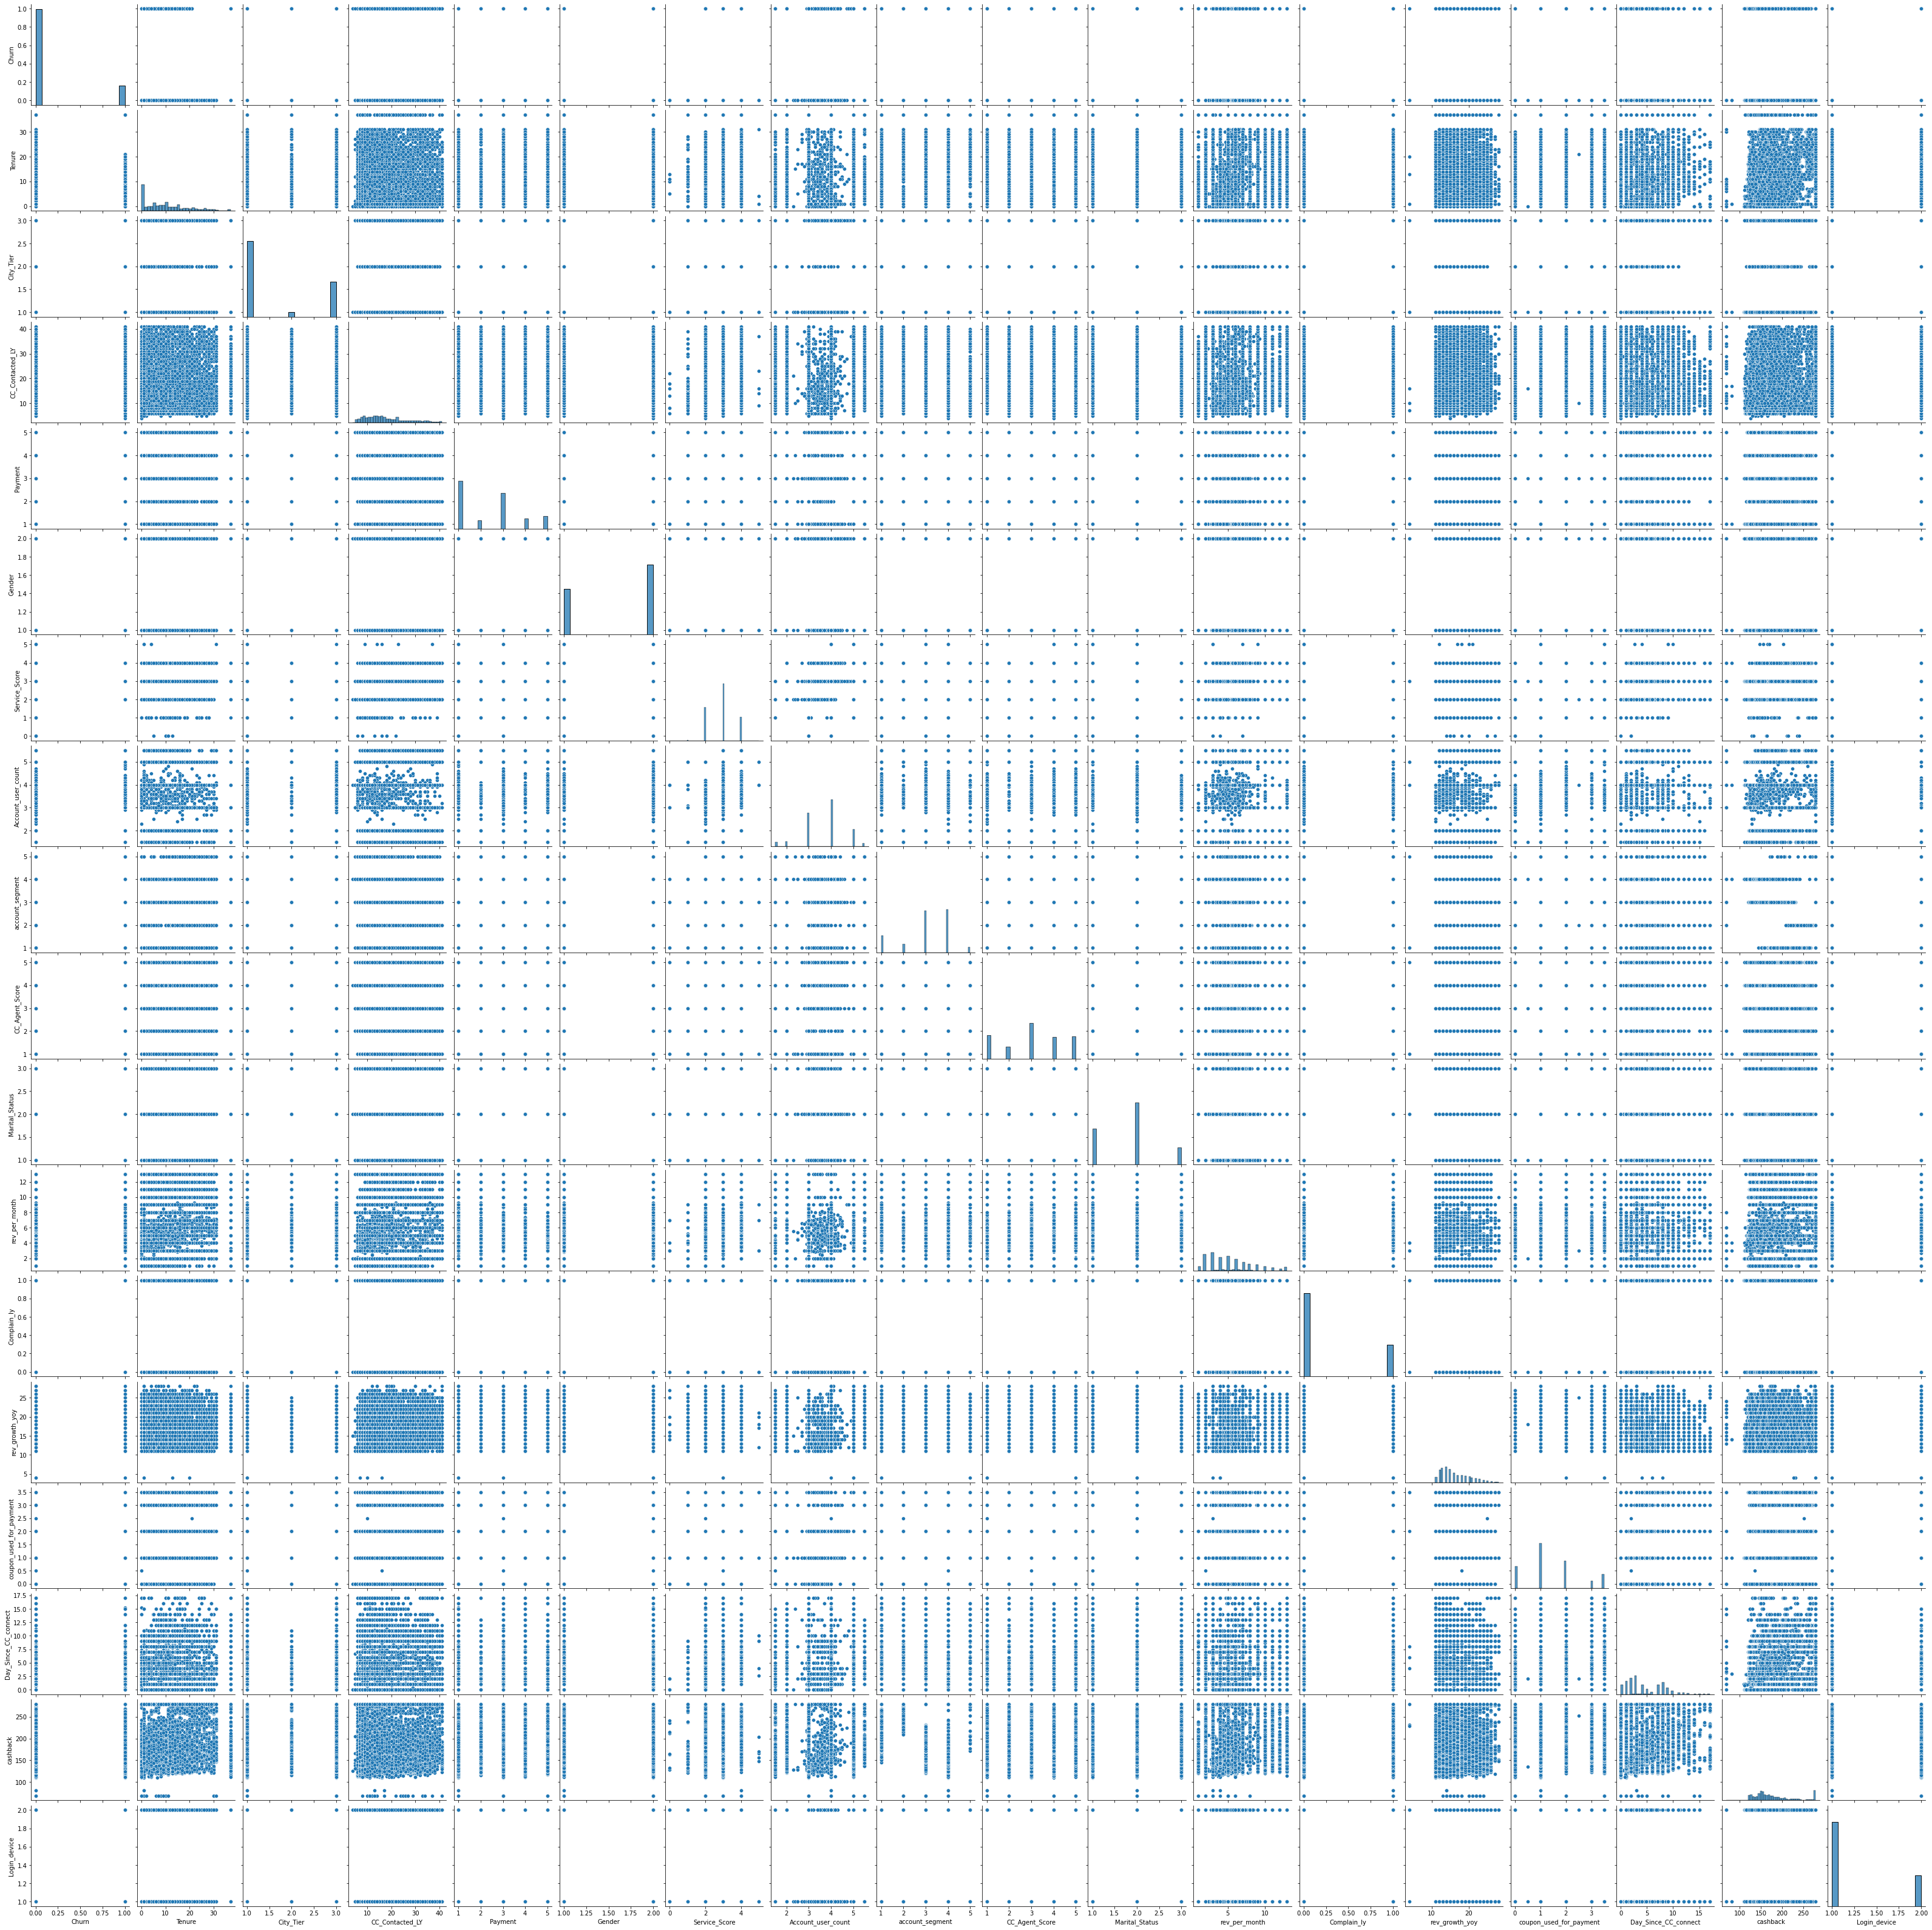

In [540]:
plt.figure(figsize=(22,22))
sns.pairplot(churn_df_imputed)
plt.show()

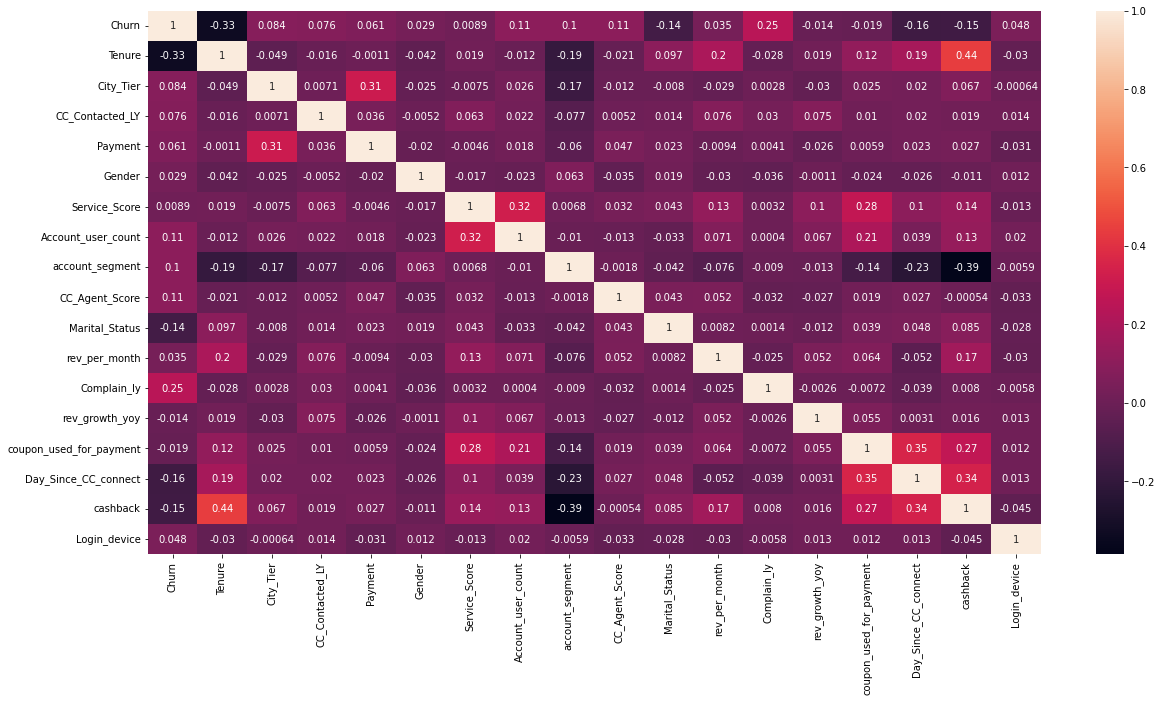

In [541]:
plt.figure(figsize=(20,10))
corr=churn_df_imputed.corr()
sns.heatmap(corr, annot=True)
plt.show()

# SCALING OF DATA

In [542]:
from sklearn.preprocessing import MinMaxScaler

churn['Scaled_Churn'] = MinMaxScaler().fit_transform(churn_df_imputed[['Churn']])
churn['Scaled_Tenure'] = MinMaxScaler().fit_transform(churn_df_imputed[['Tenure']])
churn['Scaled_City_Tier'] = MinMaxScaler().fit_transform(churn_df_imputed[['City_Tier']])
churn['Scaled_CC_Contacted_LY'] = MinMaxScaler().fit_transform(churn_df_imputed[['CC_Contacted_LY']])
churn['Scaled_Payment'] = MinMaxScaler().fit_transform(churn_df_imputed[['Payment']])
churn['Scaled_Gender'] = MinMaxScaler().fit_transform(churn_df_imputed[['Gender']])
churn['Scaled_Service_Score'] = MinMaxScaler().fit_transform(churn_df_imputed[['Service_Score']])
churn['Scaled_Account_user_count'] = MinMaxScaler().fit_transform(churn_df_imputed[['Account_user_count']])
churn['Scaled_account_segment'] = MinMaxScaler().fit_transform(churn_df_imputed[['account_segment']])
churn['Scaled_CC_Agent_Score'] = MinMaxScaler().fit_transform(churn_df_imputed[['CC_Agent_Score']])
churn['Scaled_Marital_Status'] = MinMaxScaler().fit_transform(churn_df_imputed[['Marital_Status']])
churn['Scaled_rev_per_month'] = MinMaxScaler().fit_transform(churn_df_imputed[['rev_per_month']])
churn['Scaled_Complain_ly'] = MinMaxScaler().fit_transform(churn_df_imputed[['Complain_ly']])
churn['Scaled_rev_growth_yoy'] = MinMaxScaler().fit_transform(churn_df_imputed[['rev_growth_yoy']])
churn['Scaled_coupon_used_for_payment'] = MinMaxScaler().fit_transform(churn_df_imputed[['coupon_used_for_payment']])
churn['Scaled_Day_Since_CC_connect'] = MinMaxScaler().fit_transform(churn_df_imputed[['Day_Since_CC_connect']])
churn['Scaled_cashback'] = MinMaxScaler().fit_transform(churn_df_imputed[['cashback']])
churn['Scaled_Login_device'] = MinMaxScaler().fit_transform(churn_df_imputed[['Login_device']])

In [543]:
churn_scaled = pd.DataFrame({
'Churn': churn['Scaled_Churn'] ,    
'Tenure': churn['Scaled_Tenure'] ,    
'City_Tier': churn['Scaled_City_Tier'] ,    
'CC_Contacted_LY': churn['Scaled_CC_Contacted_LY'] ,    
'Payment': churn['Scaled_Payment'] ,    
'Gender': churn['Scaled_Gender'] ,    
'Service_Score': churn['Scaled_Service_Score'] ,    
'Account_user_count': churn['Scaled_Account_user_count'] ,    
'account_segment': churn['Scaled_account_segment'] ,    
'CC_Agent_Score': churn['Scaled_CC_Agent_Score'] ,    
'Marital_Status': churn['Scaled_Marital_Status'] ,    
'rev_per_month': churn['Scaled_rev_per_month'] ,    
'Complain_ly': churn['Scaled_Complain_ly'] ,    
'rev_growth_yoy': churn['Scaled_rev_growth_yoy'] ,    
'coupon_used_for_payment': churn['Scaled_coupon_used_for_payment'] ,    
'Day_Since_CC_connect': churn['Scaled_Day_Since_CC_connect'] ,
'cashback': churn['Scaled_cashback'] ,    
'Login_device': churn['Scaled_Login_device'] })
churn_scaled


Churn    Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
0        1.0  0.108108        1.0         0.054054     0.00     0.0   
1        1.0  0.000000        0.0         0.108108     0.25     1.0   
2        1.0  0.000000        0.0         0.702703     0.00     1.0   
3        1.0  0.000000        1.0         0.297297     0.00     1.0   
4        1.0  0.000000        0.0         0.216216     0.50     1.0   
...      ...       ...        ...              ...      ...     ...   
11255    0.0  0.270270        0.0         0.810811     0.50     1.0   
11256    0.0  0.351351        0.0         0.405405     0.50     1.0   
11257    0.0  0.027027        0.0         0.270270     0.00     1.0   
11258    0.0  0.621622        1.0         0.189189     0.50     1.0   
11259    0.0  0.216216        0.0         0.486486     0.50     1.0   

       Service_Score  Account_user_count  account_segment  CC_Agent_Score  \
0                0.6               0.375             0.50            0.25   
1                0.6               0.625             0.75            0.50   
2                0.4               0.625             0.75            0.50   
3                0.4               0.625             0.50            1.00   
4                0.4               0.375             0.75            1.00   
...              ...                 ...              ...             ...   
11255            0.6               0.125             0.50            0.00   
11256            0.6               0.875             0.00            1.00   
11257            0.6               0.125             0.50            0.75   
11258            0.8               0.875             0.50            0.75   
11259            0.6               0.125             0.50            0.50   

       Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0                 0.0       0.666667          1.0        0.291667   
1                 0.0       0.500000          1.0        0.458333   
2                 0.0       0.416667          1.0        0.416667   
3                 0.0       0.583333          0.0        0.791667   
4                 0.0       0.166667          0.0        0.291667   
...               ...            ...          ...             ...   
11255             0.5       0.666667          0.0        0.625000   
11256             0.5       0.500000          0.0        0.500000   
11257             0.5       0.500000          1.0        0.750000   
11258             0.5       0.500000          0.0        0.500000   
11259             0.5       0.333333          0.0        0.375000   

       coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  
0                     0.285714              0.294118  0.433936           0.0  
1                     0.000000              0.000000  0.248938           0.0  
2                     0.000000              0.176471  0.379868           0.0  
3                     0.000000              0.176471  0.311362           0.0  
4                     0.285714              0.176471  0.290175           0.0  
...                        ...                   ...       ...           ...  
11255                 0.285714              0.235294  0.404454           1.0  
11256                 0.285714              0.470588  0.751412           0.0  
11257                 0.285714              0.235294  0.583194           0.0  
11258                 0.571429              0.529412  0.528591           1.0  
11259                 0.571429              0.176471  0.505555           0.0  

[11260 rows x 18 columns]

In [544]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [545]:
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(churn_scaled)
    wss.append(KM.inertia_)

In [546]:
wss

[20997.88100912122,
 18291.822002319506,
 16706.90709775527,
 15537.221375891699,
 14631.611767004437,
 13977.23380514639,
 13366.46759579964,
 12892.040961713066,
 12523.67150241271,
 12176.781247698995]

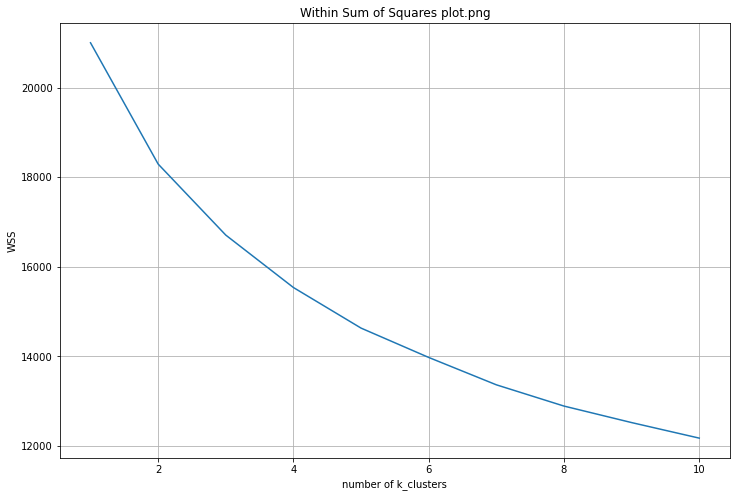

In [547]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wss)
plt.title('Within Sum of Squares plot.png')
plt.grid()
plt.savefig('q1_Within Sum of Squares plot.jpg')
plt.ylabel('WSS')
plt.xlabel('number of k_clusters')
plt.show()

## K-means with K= 2

In [548]:
k_means = KMeans(n_clusters =2)
k_means.fit(churn_scaled)
labels2 = k_means.labels_

In [549]:
labels2

array([0, 1, 1, ..., 1, 1, 1])

In [550]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [551]:
silhouette_score(churn_scaled,labels2)

0.13666920865494342

## K-means with  K= 3

In [552]:
k_means = KMeans(n_clusters =3)
k_means.fit(churn_scaled)
labels3 = k_means.labels_

In [553]:
silhouette_score(churn_scaled,labels3)

0.12957428869028037

## K-means with K= 4

In [554]:
k_means = KMeans(n_clusters =4)
k_means.fit(churn_scaled)
labels4 = k_means.labels_

In [555]:
silhouette_score(churn_scaled,labels4)

0.1286086122242126

In [556]:
## K=2 and 3 are giving 0.9 scores approximately

In [557]:
churn["Clus_kmeans"] = labels3
churn.head(5)

Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0      1       4          3                6        1       1              3   
1      1       0          1                8        2       2              3   
2      1       0          1               30        1       2              2   
3      1       0          3               15        1       2              2   
4      1       0          1               12        3       2              2   

   Account_user_count  account_segment  CC_Agent_Score  ...  \
0                 3.0                3               2  ...   
1                 4.0                4               3  ...   
2                 4.0                4               3  ...   
3                 4.0                3               5  ...   
4                 3.0                4               5  ...   

   Scaled_CC_Agent_Score  Scaled_Marital_Status  Scaled_rev_per_month  \
0                   0.25                    0.0              0.666667   
1                   0.50                    0.0              0.500000   
2                   0.50                    0.0              0.416667   
3                   1.00                    0.0              0.583333   
4                   1.00                    0.0              0.166667   

   Scaled_Complain_ly  Scaled_rev_growth_yoy  Scaled_coupon_used_for_payment  \
0                 1.0               0.291667                        0.285714   
1                 1.0               0.458333                        0.000000   
2                 1.0               0.416667                        0.000000   
3                 0.0               0.791667                        0.000000   
4                 0.0               0.291667                        0.285714   

   Scaled_Day_Since_CC_connect  Scaled_cashback  Scaled_Login_device  \
0                     0.294118         0.433936                  0.0   
1                     0.000000         0.248938                  0.0   
2                     0.176471         0.379868                  0.0   
3                     0.176471         0.311362                  0.0   
4                     0.176471         0.290175                  0.0   

   Clus_kmeans  
0            0  
1            0  
2            0  
3            1  
4            1  

[5 rows x 37 columns]

In [558]:
sil_width = silhouette_samples(churn_scaled,labels3)

In [559]:
churn["sil_width"] = sil_width
churn.head(5)

Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0      1       4          3                6        1       1              3   
1      1       0          1                8        2       2              3   
2      1       0          1               30        1       2              2   
3      1       0          3               15        1       2              2   
4      1       0          1               12        3       2              2   

   Account_user_count  account_segment  CC_Agent_Score  ...  \
0                 3.0                3               2  ...   
1                 4.0                4               3  ...   
2                 4.0                4               3  ...   
3                 4.0                3               5  ...   
4                 3.0                4               5  ...   

   Scaled_Marital_Status  Scaled_rev_per_month  Scaled_Complain_ly  \
0                    0.0              0.666667                 1.0   
1                    0.0              0.500000                 1.0   
2                    0.0              0.416667                 1.0   
3                    0.0              0.583333                 0.0   
4                    0.0              0.166667                 0.0   

   Scaled_rev_growth_yoy  Scaled_coupon_used_for_payment  \
0               0.291667                        0.285714   
1               0.458333                        0.000000   
2               0.416667                        0.000000   
3               0.791667                        0.000000   
4               0.291667                        0.285714   

   Scaled_Day_Since_CC_connect  Scaled_cashback  Scaled_Login_device  \
0                     0.294118         0.433936                  0.0   
1                     0.000000         0.248938                  0.0   
2                     0.176471         0.379868                  0.0   
3                     0.176471         0.311362                  0.0   
4                     0.176471         0.290175                  0.0   

   Clus_kmeans  sil_width  
0            0   0.081922  
1            0   0.105884  
2            0   0.105698  
3            1   0.121263  
4            1   0.142575  

[5 rows x 38 columns]

In [560]:
silhouette_samples(churn_scaled,labels3).min()

0.009016203693287282

In [561]:
sil_score =[]
for i in range(2,11):
    k_means = KMeans(n_clusters = i,random_state=0)
    k_means.fit(churn_scaled)
    labels = k_means.labels_
    sil=silhouette_score(churn_scaled,labels)
    sil_score.append(sil)

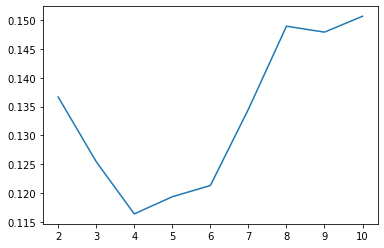

In [562]:
#silhouette_score Plot
plt.plot(range(2,11), sil_score);

In [563]:
churn["Clus_kmeans"].value_counts(normalize = True)

1    0.445648
2    0.278064
0    0.276288
Name: Clus_kmeans, dtype: float64

In [564]:
churn.groupby(["Clus_kmeans"]).count()


Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
Clus_kmeans                                                               
0             3111    3041       3111             3079     3111    3111   
1             5018    4930       5018             4976     5018    5018   
2             3131    3071       3131             3103     3131    3131   

             Service_Score  Account_user_count  account_segment  \
Clus_kmeans                                                       
0                     3111                2984             3111   
1                     5018                4810             5018   
2                     3131                3022             3131   

             CC_Agent_Score  ...  Scaled_CC_Agent_Score  \
Clus_kmeans                  ...                          
0                      3111  ...                   3111   
1                      5018  ...                   5018   
2                      3131  ...                   3131   

             Scaled_Marital_Status  Scaled_rev_per_month  Scaled_Complain_ly  \
Clus_kmeans                                                                    
0                             3111                  3111                3111   
1                             5018                  5018                5018   
2                             3131                  3131                3131   

             Scaled_rev_growth_yoy  Scaled_coupon_used_for_payment  \
Clus_kmeans                                                          
0                             3111                            3111   
1                             5018                            5018   
2                             3131                            3131   

             Scaled_Day_Since_CC_connect  Scaled_cashback  \
Clus_kmeans                                                 
0                                   3111             3111   
1                                   5018             5018   
2                                   3131             3131   

             Scaled_Login_device  sil_width  
Clus_kmeans                                  
0                           3111       3111  
1                           5018       5018  
2                           3131       3131  

[3 rows x 37 columns]

<AxesSubplot:xlabel='Clus_kmeans', ylabel='Tenure'>

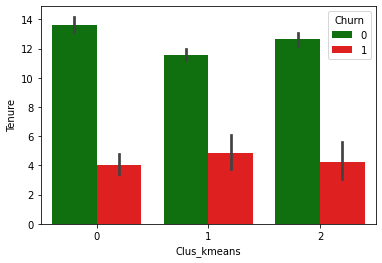

In [565]:
sns.barplot(churn['Clus_kmeans'], churn['Tenure'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='rev_per_month'>

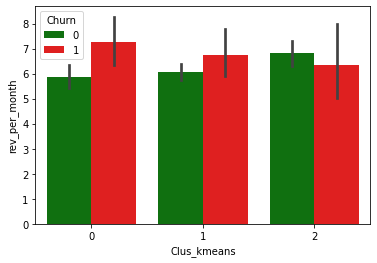

In [566]:
sns.barplot(churn['Clus_kmeans'], churn['rev_per_month'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='rev_growth_yoy'>

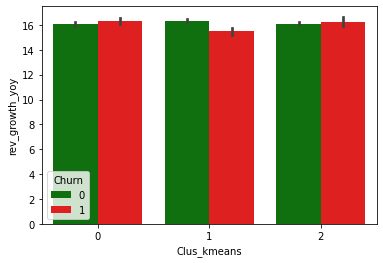

In [567]:
sns.barplot(churn['Clus_kmeans'], churn['rev_growth_yoy'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='cashback'>

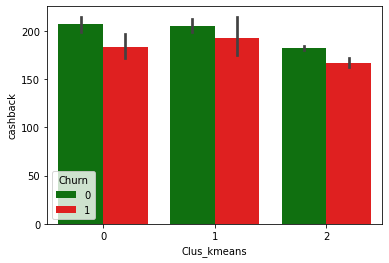

In [568]:
sns.barplot(churn['Clus_kmeans'], churn['cashback'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='City_Tier'>

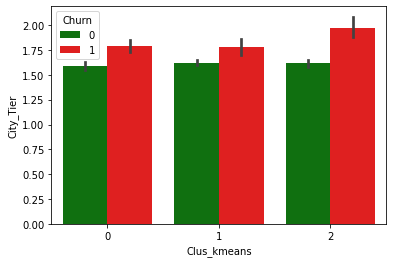

In [569]:
sns.barplot(churn['Clus_kmeans'], churn['City_Tier'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='account_segment'>

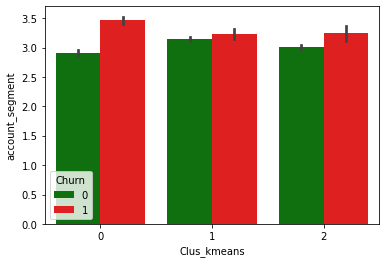

In [570]:
sns.barplot(churn['Clus_kmeans'], churn['account_segment'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='Service_Score'>

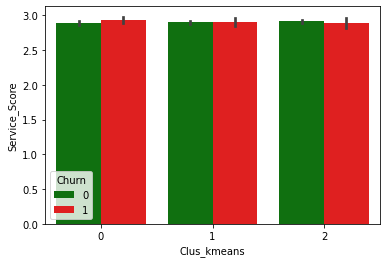

In [571]:
sns.barplot(churn['Clus_kmeans'], churn['Service_Score'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='Marital_Status'>

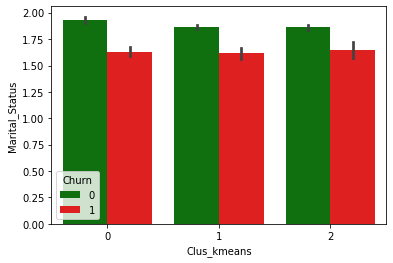

In [572]:
sns.barplot(churn['Clus_kmeans'], churn['Marital_Status'],hue=churn['Churn'], palette =['g','r'])

<AxesSubplot:xlabel='Clus_kmeans', ylabel='Day_Since_CC_connect'>

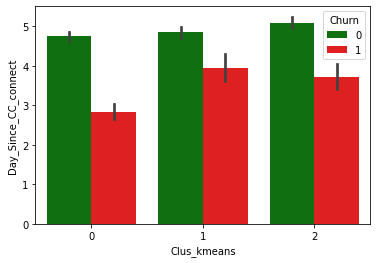

In [230]:
sns.barplot(churn['Clus_kmeans'], churn['Day_Since_CC_connect'],hue=churn['Churn'], palette =['g','r'])

# PROJECT 2

## LOGISTIC REGRESSION

In [573]:
# splitting data into independent and dependent variables
X = churn_scaled.drop('Churn' , axis=1)

Y = churn_scaled.pop("Churn")

In [574]:
# Split X and y into training and test set in 70:30 ratio

X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

In [233]:
from sklearn.linear_model import LogisticRegression

In [575]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [576]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (7881, 17)
Number of rows and columns of the training set for the dependent variable: (7881,)
Number of rows and columns of the test set for the independent variables: (3379, 17)
Number of rows and columns of the test set for the dependent variable: (3379,)


In [577]:
X.head()

Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0  0.108108        1.0         0.054054     0.00     0.0            0.6   
1  0.000000        0.0         0.108108     0.25     1.0            0.6   
2  0.000000        0.0         0.702703     0.00     1.0            0.4   
3  0.000000        1.0         0.297297     0.00     1.0            0.4   
4  0.000000        0.0         0.216216     0.50     1.0            0.4   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0               0.375             0.50            0.25             0.0   
1               0.625             0.75            0.50             0.0   
2               0.625             0.75            0.50             0.0   
3               0.625             0.50            1.00             0.0   
4               0.375             0.75            1.00             0.0   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0       0.666667          1.0        0.291667                 0.285714   
1       0.500000          1.0        0.458333                 0.000000   
2       0.416667          1.0        0.416667                 0.000000   
3       0.583333          0.0        0.791667                 0.000000   
4       0.166667          0.0        0.291667                 0.285714   

   Day_Since_CC_connect  cashback  Login_device  
0              0.294118  0.433936           0.0  
1              0.000000  0.248938           0.0  
2              0.176471  0.379868           0.0  
3              0.176471  0.311362           0.0  
4              0.176471  0.290175           0.0

In [578]:
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Churn, dtype: float64

## Predicting on Training and Test dataset

In [579]:
ytrain_predict =Logistic_model.predict(X_train)
ytest_predict =Logistic_model.predict(X_test)

## Getting the Predicted Classes and Probs

In [580]:
ytest_predict_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.560717  0.439283
1  0.367121  0.632879
2  0.900738  0.099262
3  0.742378  0.257622
4  0.977106  0.022894

## Model Evaluation

In [581]:
# Accuracy - Training Data
Logistic_model.score(X_train, Y_train)

0.8794569217104429

## AUC and ROC for the training data of Logistic Regression

AUC: 0.865


Text(0.5, 1.0, 'ROC of training data of Logistic Regression')

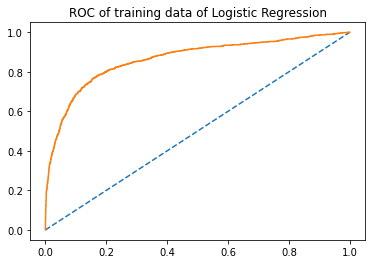

In [582]:
# predict probabilities
probs =Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title("ROC of training data of Logistic Regression")

## AUC and ROC for the test data for Logistic Regression

AUC: 0.865


Text(0.5, 1.0, 'ROC of testing data of Logistic Regression')

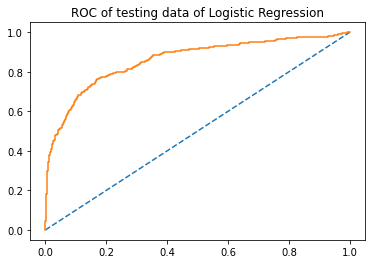

In [583]:
# predict probabilities
probs = Logistic_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.title("ROC of testing data of Logistic Regression")

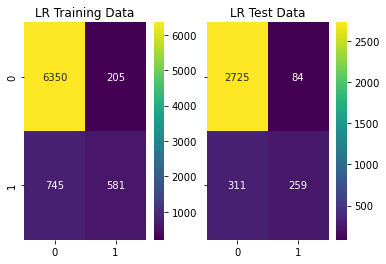

In [584]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='viridis',ax=a[0][0]);
a[0][0].set_title('LR Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,ytest_predict)),annot=True,fmt='.5g',cmap='viridis',ax=a[0][1]);
a[0][1].set_title('LR Test Data');


In [585]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6555
         1.0       0.74      0.44      0.55      1326

    accuracy                           0.88      7881
   macro avg       0.82      0.70      0.74      7881
weighted avg       0.87      0.88      0.87      7881



In [586]:
print(classification_report(Y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2809
         1.0       0.76      0.45      0.57       570

    accuracy                           0.88      3379
   macro avg       0.83      0.71      0.75      3379
weighted avg       0.87      0.88      0.87      3379



## Applying GridSearchCV for Logistic Regression

In [587]:
grid={'penalty':['l2','none'],
      'solver':['newton-cg','liblinear','saga', 'lbfgs'],
      'max_iter':[10000,100000],
      'tol':[0.0001,0.001, 0.01]
     }

In [588]:
LRmodel1 = LogisticRegression(max_iter=10000,n_jobs=2)

In [589]:
grid_search = GridSearchCV(estimator = LRmodel1, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [590]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'max_iter': [10000, 100000], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'liblinear', 'saga', 'lbfgs'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='f1')

In [250]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 10000, 'penalty': 'none', 'solver': 'saga', 'tol': 0.001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='saga',
                   tol=0.001)


In [592]:
LRbest_model1 = grid_search.best_estimator_

## Prediction on the training set

In [593]:
LRbest_model1_ytrain_predict1 = LRbest_model1.predict(X_train)
LRbest_model1_ytest_predict1 = LRbest_model1.predict(X_test)

## Getting the Predicted Classes and Probs

In [594]:
LRbest_model1_ytrainprob_predict1=LRbest_model1.predict_proba(X_train)
pd.DataFrame(LRbest_model1_ytrain_predict1).head()

0
0  0.0
1  0.0
2  0.0
3  0.0
4  1.0

In [595]:
LRbest_model1_ytestprob_predict1 =LRbest_model1.predict_proba(X_test)
pd.DataFrame(LRbest_model1_ytest_predict1 ).head()

0
0  0.0
1  1.0
2  0.0
3  0.0
4  0.0

In [596]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lr_train= LRbest_model1.score(X_train, Y_train)
print(" accuracy_lr_train:",accuracy_lr_train) 

 accuracy_lr_train: 0.8794569217104429


In [597]:
accuracy_lr_test= LRbest_model1.score(X_test, Y_test)
print(" accuracy_lr_test:",accuracy_lr_test) 

 accuracy_lr_test: 0.8831015093222847


In [598]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LRbest_model1.coef_[0][idx]))

The coefficient for Tenure is -6.488538891778792
The coefficient for City_Tier is 0.5267201477075887
The coefficient for CC_Contacted_LY is 0.8760475776587998
The coefficient for Payment is 0.3782515727813658
The coefficient for Gender is 0.2652346879135304
The coefficient for Service_Score is -0.6201861618553959
The coefficient for Account_user_count is 1.3271087774905574
The coefficient for account_segment is 0.7613835628409746
The coefficient for CC_Agent_Score is 1.1388272794103127
The coefficient for Marital_Status is -1.0763709793494258
The coefficient for rev_per_month is 1.4774179954602267
The coefficient for Complain_ly is 1.6657385345814977
The coefficient for rev_growth_yoy is -0.5039336570200201
The coefficient for coupon_used_for_payment is 0.6246450154194119
The coefficient for Day_Since_CC_connect is -1.524197683104849
The coefficient for cashback is 0.17575340774296025
The coefficient for Login_device is 0.39999584085175277


## Confusion matrix on the Logistic best Model training and test data

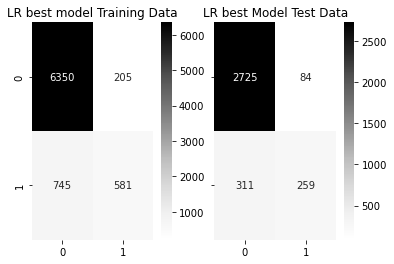

In [599]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,LRbest_model1_ytrain_predict1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LR best model Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,LRbest_model1_ytest_predict1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LR best Model Test Data');

In [600]:
print(classification_report(Y_train, LRbest_model1_ytrain_predict1))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6555
         1.0       0.74      0.44      0.55      1326

    accuracy                           0.88      7881
   macro avg       0.82      0.70      0.74      7881
weighted avg       0.87      0.88      0.87      7881



In [601]:
print(classification_report(Y_test,LRbest_model1_ytest_predict1))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2809
         1.0       0.76      0.45      0.57       570

    accuracy                           0.88      3379
   macro avg       0.83      0.71      0.75      3379
weighted avg       0.87      0.88      0.87      3379



## AUC and ROC with logistic Regression best model 

AUC: 0.865


Text(0.5, 1.0, 'ROC of LR best Model training data of Logistic Regression')

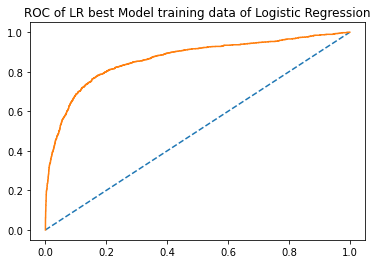

In [602]:

# predict probabilities
probs =LRbest_model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
LRbest_model1_train_fpr, LRbest_model1_train_tpr, LRbest_model1_train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LRbest_model1_train_fpr,LRbest_model1_train_tpr);
plt.title("ROC of LR best Model training data of Logistic Regression")


AUC: 0.860


Text(0.5, 1.0, 'ROC of LR best Model testing data of Logistic Regression')

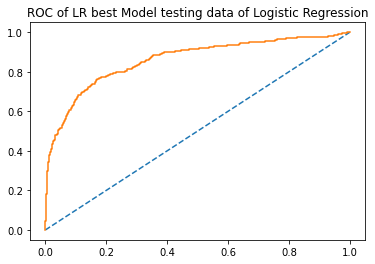

In [603]:
# predict probabilities
probs =LRbest_model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
LRbest_model1_test_fpr, LRbest_model1_test_tpr, LRbest_model1_test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LRbest_model1_test_fpr,LRbest_model1_test_tpr);
plt.title("ROC of LR best Model testing data of Logistic Regression")

In [604]:
from sklearn.model_selection import cross_val_score
print("cross validation score for training dataset")
scores_logCV_train = cross_val_score(LRbest_model1, X_train, Y_train, cv=10)
scores_logCV_train

cross validation score for training dataset


array([0.87072243, 0.88832487, 0.8819797 , 0.87944162, 0.87690355,
       0.88705584, 0.87944162, 0.87563452, 0.87436548, 0.87309645])

In [605]:
from sklearn.model_selection import cross_val_score
print("cross validation score for testing dataset")
scores_logCV_train = cross_val_score(LRbest_model1, X_test, Y_test, cv=10)
scores_logCV_train

cross validation score for testing dataset


array([0.87278107, 0.88757396, 0.89053254, 0.87278107, 0.89349112,
       0.89349112, 0.88461538, 0.87278107, 0.8816568 , 0.88130564])

In [606]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=1)
X_train_smote, Y_train_smote = smt.fit_resample(X_train, Y_train)

## Logistic Regression with smote

In [607]:
Smote_LR = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Smote_LR.fit(X_train_smote,Y_train_smote)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [608]:
Smote_LR_ytrain_predict =Smote_LR.predict(X_train_smote)
Smote_LR_ytest_predict =Smote_LR.predict(X_test)

In [609]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",Smote_LR.score(X_train_smote,Y_train_smote))

Accuracy of training dataset: 0.8011441647597254


In [610]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",Smote_LR.score(X_test, Y_test))

Accuracy of testing dataset: 0.7789286771234093


In [611]:
print(classification_report(Y_train_smote,Smote_LR_ytrain_predict))
print(classification_report(Y_test,Smote_LR_ytest_predict ))

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80      6555
         1.0       0.79      0.82      0.80      6555

    accuracy                           0.80     13110
   macro avg       0.80      0.80      0.80     13110
weighted avg       0.80      0.80      0.80     13110

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.85      2809
         1.0       0.42      0.79      0.55       570

    accuracy                           0.78      3379
   macro avg       0.68      0.78      0.70      3379
weighted avg       0.86      0.78      0.80      3379



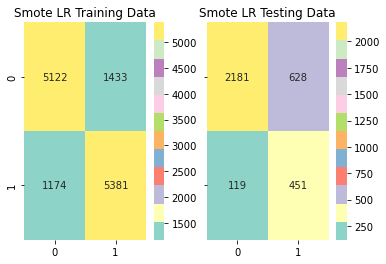

In [612]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train_smote, Smote_LR_ytrain_predict)),annot=True,fmt='.5g',cmap='Set3',ax=a[0][0]);
a[0][0].set_title('Smote LR Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,Smote_LR_ytest_predict)),annot=True,fmt='.5g',cmap='Set3',ax=a[0][1]);
a[0][1].set_title('Smote LR Testing Data');

## AUC and ROC curve with smote logistic Regression

AUC: 0.873


Text(0.5, 1.0, 'ROC of training data of Smote LR best Model')

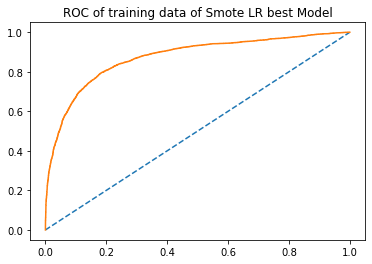

In [613]:
# predict probabilities
probs =Smote_LR.predict_proba(X_train_smote)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train_smote, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_LR_train_fpr, Smote_LR_train_tpr, train_thresholds = roc_curve(Y_train_smote, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_LR_train_fpr,Smote_LR_train_tpr);
plt.title("ROC of training data of Smote LR best Model")

AUC: 0.859


Text(0.5, 1.0, 'ROC of testing data of Smote LR best Model')

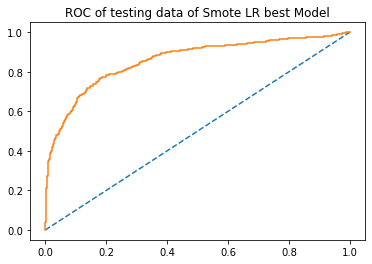

In [614]:
# predict probabilities
probs =Smote_LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_LR_test_fpr, Smote_LR_test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_LR_test_fpr,Smote_LR_test_tpr);
plt.title('ROC of testing data of Smote LR best Model')

# Linear Discriminant Analysis

In [615]:
#Build LDA Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_train,Y_train)

In [616]:
# Training Data Class Prediction with a cut-off value of 0.5
LDA_pred_train = model_lda.predict(X_train)
# Test Data Class Prediction with a cut-off value of 0.5
LDA_pred_test = model_lda.predict(X_test)

## Probability prediction for the training and test data

In [617]:
# Training Data Probability Prediction
LDA_pred_prob_train = model_lda.predict_proba(X_train)

# Test Data Probability Prediction
LDA_pred_prob_test= model_lda.predict_proba(X_test)

In [618]:
# Training Accuracy
lda_train_accuracy= model_lda.score(X_train, Y_train)
lda_test_accuracy= model_lda.score(X_test, Y_test)

In [619]:
print("lda_train_accuracy:", lda_train_accuracy)

lda_train_accuracy: 0.8747620860296916


In [620]:

print("lda_test_accuracy:", lda_test_accuracy)

lda_test_accuracy: 0.8795501627700503


In [621]:
LDA_pred_prob_train

array([[0.9581182 , 0.0418818 ],
       [0.98904821, 0.01095179],
       [0.93728901, 0.06271099],
       ...,
       [0.97466797, 0.02533203],
       [0.23505358, 0.76494642],
       [0.99844718, 0.00155282]])

In [622]:
LDA_pred_prob_test

array([[0.57156893, 0.42843107],
       [0.44052119, 0.55947881],
       [0.89082475, 0.10917525],
       ...,
       [0.80945818, 0.19054182],
       [0.83397558, 0.16602442],
       [0.86382187, 0.13617813]])

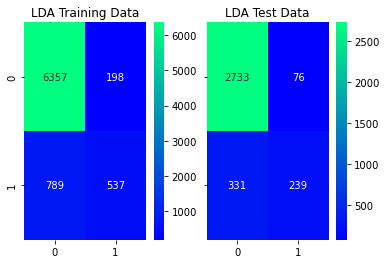

In [623]:
#Training Data and Test Data Confusion Matrix Comparison

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,LDA_pred_train)),annot=True,fmt='.5g',cmap='winter',ax=a[0][0]);
a[0][0].set_title('LDA Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,LDA_pred_test)),annot=True,fmt='.5g',cmap='winter',ax=a[0][1]);
a[0][1].set_title('LDA Test Data');

In [624]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,LDA_pred_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,LDA_pred_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6555
         1.0       0.73      0.40      0.52      1326

    accuracy                           0.87      7881
   macro avg       0.81      0.69      0.72      7881
weighted avg       0.86      0.87      0.86      7881
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2809
         1.0       0.76      0.42      0.54       570

    accuracy                           0.88      3379
   macro avg       0.83      0.70      0.74      3379
weighted avg       0.87      0.88      0.86      3379
 



AUC for the Training Data: 0.855
AUC for the Test Data: 0.847


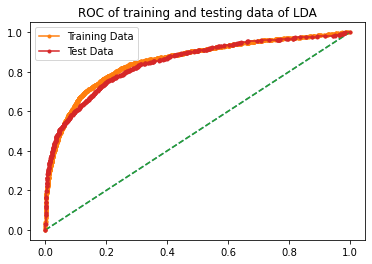

In [625]:
# Training Data Probability Prediction
LDA_pred_prob_train = model_lda.predict_proba(X_train)


# Test Data Probability Prediction
LDA_pred_prob_test= model_lda.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
auc_lda_train = metrics.roc_auc_score(Y_train,LDA_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc_lda_train)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,LDA_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc_lda_test = metrics.roc_auc_score(Y_test,LDA_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc_lda_test)
plt.title("ROC of training and testing data of LDA")
#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,LDA_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


In [626]:
model_lda2 = LinearDiscriminantAnalysis()
grid={ 'solver': ['svd', 'lsqr', 'eigen'],
    'tol' : [0.0001,0.0002,0.0003],
    'shrinkage' : ['auto', 'float', 'None'],
     }
grid_search = GridSearchCV(estimator = model_lda2, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

grid_search.fit(X_train, Y_train)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')


In [627]:
LDA_best_model = grid_search.best_estimator_
# Prediction on the training set
LDA_best_model_ytrain_predict =LDA_best_model.predict(X_train)
LDA_best_model_ytest_predict = LDA_best_model.predict(X_test)

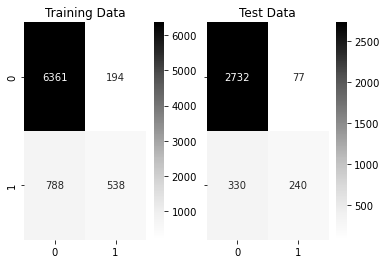

In [628]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,LDA_best_model_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,LDA_best_model_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [288]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,LDA_best_model_ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,LDA_best_model_ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6555
         1.0       0.73      0.41      0.52      1326

    accuracy                           0.88      7881
   macro avg       0.81      0.69      0.73      7881
weighted avg       0.86      0.88      0.86      7881
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2809
         1.0       0.76      0.42      0.54       570

    accuracy                           0.88      3379
   macro avg       0.82      0.70      0.74      3379
weighted avg       0.87      0.88      0.86      3379
 



AUC for the Training Data: 0.854
AUC for the Test Data: 0.847


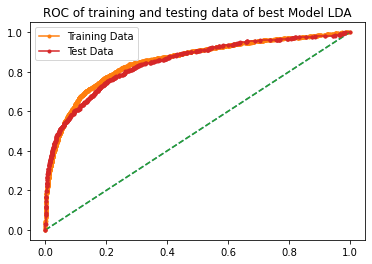

In [629]:
# Training Data Probability Prediction
pred_prob_train_lda = LDA_best_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_lda = LDA_best_model.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
auc_lda_train = metrics.roc_auc_score(Y_train,pred_prob_train_lda[:,1])
print('AUC for the Training Data: %.3f' % auc_lda_train)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc_lda_test = metrics.roc_auc_score(Y_test,pred_prob_test_lda[:,1])
print('AUC for the Test Data: %.3f' % auc_lda_test)
plt.title("ROC of training and testing data of best Model LDA")
#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


## LDA with Smote

In [630]:
#Build LDA Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Build LDA Model
LDA3 = LinearDiscriminantAnalysis()
Smote_LDA=LDA3.fit(X_train_smote, Y_train_smote)


In [631]:
Smote_LDA_ytrain_predict =Smote_LDA.predict(X_train_smote)
Smote_LDA_ytest_predict =Smote_LDA.predict(X_test)

## Probability prediction for the training and test data

In [632]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",Smote_LDA.score(X_train_smote,Y_train_smote))


Accuracy of training dataset: 0.7958047292143402


In [633]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",Smote_LDA.score(X_test, Y_test))


Accuracy of testing dataset: 0.7602841077241788


In [634]:
print(classification_report(Y_train_smote,Smote_LDA_ytrain_predict))
print(classification_report(Y_test,Smote_LDA_ytest_predict ))


              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79      6555
         1.0       0.78      0.83      0.80      6555

    accuracy                           0.80     13110
   macro avg       0.80      0.80      0.80     13110
weighted avg       0.80      0.80      0.80     13110

              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84      2809
         1.0       0.39      0.79      0.53       570

    accuracy                           0.76      3379
   macro avg       0.67      0.77      0.68      3379
weighted avg       0.85      0.76      0.79      3379



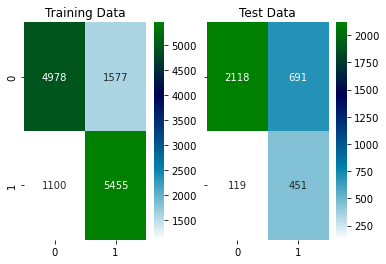

In [635]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train_smote, Smote_LDA_ytrain_predict)),annot=True,fmt='.5g',cmap='ocean_r',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,Smote_LDA_ytest_predict)),annot=True,fmt='.5g',cmap='ocean_r',ax=a[0][1]);
a[0][1].set_title('Test Data');


# AUC and ROC LDA with smote

AUC: 0.871


Text(0.5, 1.0, 'ROC of training data LDA with smote')

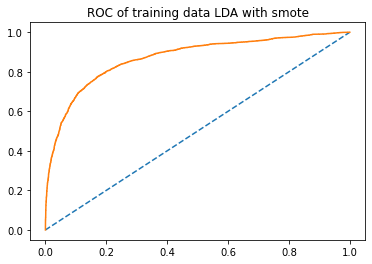

In [636]:
# predict probabilities
probs =Smote_LDA.predict_proba(X_train_smote)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train_smote, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_LDA_train_fpr, Smote_LDA_train_tpr, train_thresholds = roc_curve(Y_train_smote, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_LDA_train_fpr,Smote_LDA_train_tpr);
plt.title('ROC of training data LDA with smote')


AUC: 0.856


Text(0.5, 1.0, 'ROC of testing data LDA with smote')

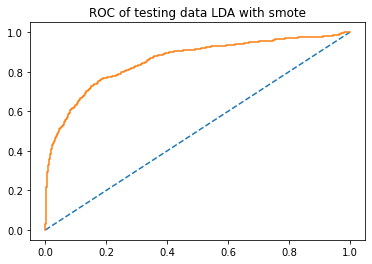

In [637]:
# predict probabilities
probs =Smote_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_LDA_test_fpr, Smote_LDA_test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_LDA_test_fpr,Smote_LDA_test_tpr);
plt.title('ROC of testing data LDA with smote')


# BUILD A DECISION TREE CLASSIFIER

In [638]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [639]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

DTCL = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = DTCL, param_grid = param_grid, cv = 10)

In [640]:
grid_search.fit(X_train,Y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

## Generating Tree

In [641]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

## Variable Importance

In [642]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.583172
Complain_ly              0.128505
Day_Since_CC_connect     0.091707
rev_per_month            0.067105
CC_Agent_Score           0.054792
Payment                  0.020554
account_segment          0.013649
City_Tier                0.012797
Marital_Status           0.011893
rev_growth_yoy           0.005587
cashback                 0.003057
CC_Contacted_LY          0.003038
Gender                   0.002089
coupon_used_for_payment  0.001876
Account_user_count       0.000179
Service_Score            0.000000
Login_device             0.000000


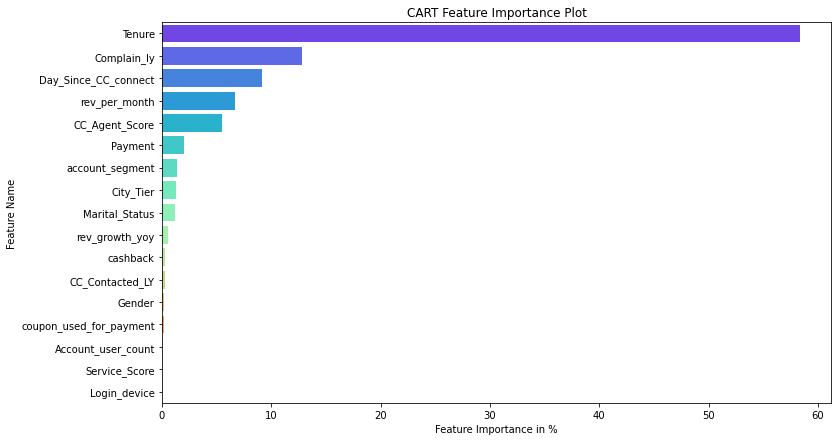

In [643]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('CART Feature Importance Plot')
plt.show()


## Predicting on Training and Test dataset

In [644]:
DT_ytrain_predict = best_grid.predict(X_train)
DT_ytest_predict = best_grid.predict(X_test)

## Getting the Predicted Classes and Probs

In [645]:
DT_ytest_predict
DT_ytest_predict_prob=best_grid.predict_proba(X_test)
DT_ytest_predict_prob
pd.DataFrame(DT_ytest_predict_prob).head()

0         1
0  0.032520  0.967480
1  0.533333  0.466667
2  1.000000  0.000000
3  0.533333  0.466667
4  1.000000  0.000000

## Model Evaluation

## AUC and ROC for the training data

AUC: 0.931


Text(0.5, 1.0, 'ROC of training data of CART')

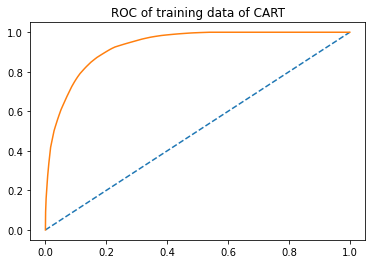

In [646]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.title("ROC of training data of CART")

## AUC and ROC for the test data

AUC: 0.904


Text(0.5, 1.0, 'ROC of testing data of CART')

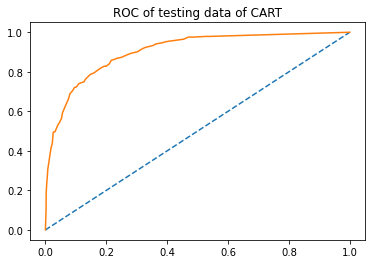

In [647]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.title("ROC of testing data of CART")

## Decision tree Accuracy score, Classification report and Confusion Matrix

In [648]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,Y_train) 
cart_train_acc

0.8926532165968786

In [649]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,Y_test) 
cart_test_acc

0.8890204202426754

In [650]:

print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,DT_ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,DT_ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      6555
         1.0       0.77      0.52      0.62      1326

    accuracy                           0.89      7881
   macro avg       0.84      0.74      0.78      7881
weighted avg       0.88      0.89      0.88      7881
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      2809
         1.0       0.76      0.50      0.60       570

    accuracy                           0.89      3379
   macro avg       0.83      0.73      0.77      3379
weighted avg       0.88      0.89      0.88      3379
 



## Confusion Matrix for train and test data

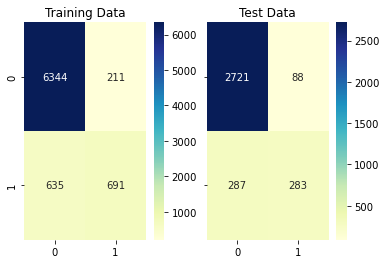

In [651]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,DT_ytrain_predict)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,DT_ytest_predict)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

# Decision Tree with SMOTE

In [652]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

DTCL = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = DTCL, param_grid = param_grid, cv = 10)



In [654]:
grid_search.fit(X_train_smote,Y_train_smote)
print(grid_search.best_params_)
Smote_CART = grid_search.best_estimator_
Smote_CART


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [655]:
DT_ytrain_smote_predict = Smote_CART.predict(X_train_smote)
DT_ytest_smote_predict = Smote_CART.predict(X_test)

# Model Evaluation

## AUC and ROC of training data of CART with SMOTE

AUC: 0.956


Text(0.5, 1.0, 'ROC of training data of CART with smote')

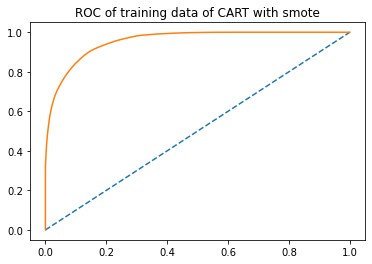

In [656]:
# predict probabilities
probs =Smote_CART.predict_proba(X_train_smote)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train_smote, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_CART_train_fpr, Smote_CART_train_tpr, train_thresholds = roc_curve(Y_train_smote, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_CART_train_fpr,Smote_CART_train_tpr);
plt.title("ROC of training data of CART with smote")



# AUC and ROC of testing data of CART with SMOTE

AUC: 0.917


Text(0.5, 1.0, 'ROC of testing data of CART with smote')

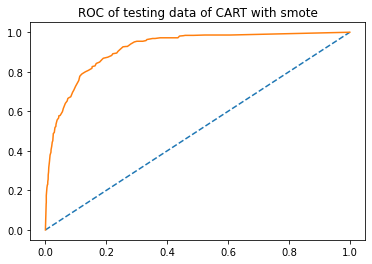

In [657]:
# predict probabilities
probs =Smote_CART.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_CART_test_fpr, Smote_CART_test_tpr, train_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_CART_test_fpr,Smote_CART_test_tpr);
plt.title("ROC of testing data of CART with smote")


## Probability prediction for the training and test data

In [658]:

#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",Smote_CART.score(X_train_smote,Y_train_smote))

#Accuracy - testing Data
print("Accuracy of testing dataset:",Smote_CART.score(X_test, Y_test))


Accuracy of training dataset: 0.8785659801678108
Accuracy of testing dataset: 0.844924533885765


In [318]:
print(classification_report(Y_train_smote,DT_ytrain_smote_predict))
print(classification_report(Y_test,DT_ytest_smote_predict ))


              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      6555
         1.0       0.86      0.90      0.88      6555

    accuracy                           0.88     13110
   macro avg       0.88      0.88      0.88     13110
weighted avg       0.88      0.88      0.88     13110

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      2809
         1.0       0.53      0.81      0.64       570

    accuracy                           0.84      3379
   macro avg       0.74      0.83      0.77      3379
weighted avg       0.88      0.84      0.86      3379



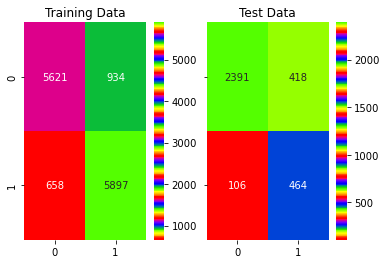

In [659]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train_smote, DT_ytrain_smote_predict)),annot=True,fmt='.5g',cmap='prism',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,DT_ytest_smote_predict)),annot=True,fmt='.5g',cmap='prism',ax=a[0][1]);
a[0][1].set_title('Test Data');


# Random Forest

In [660]:
param_grid = {
    'max_depth': [10,20],
    'max_features': [6,7,8],
    'min_samples_leaf': [10,20],
    'min_samples_split': [15,20],
    'n_estimators': [100, 150] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [661]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 20], 'max_features': [6, 7, 8],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [15, 20],
                         'n_estimators': [100, 150]})

In [322]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 100}

In [662]:
best_grid_rfcl = grid_search.best_estimator_

In [663]:
best_grid_rfcl

RandomForestClassifier(max_depth=20, max_features=7, min_samples_leaf=10,
                       min_samples_split=15, random_state=1)

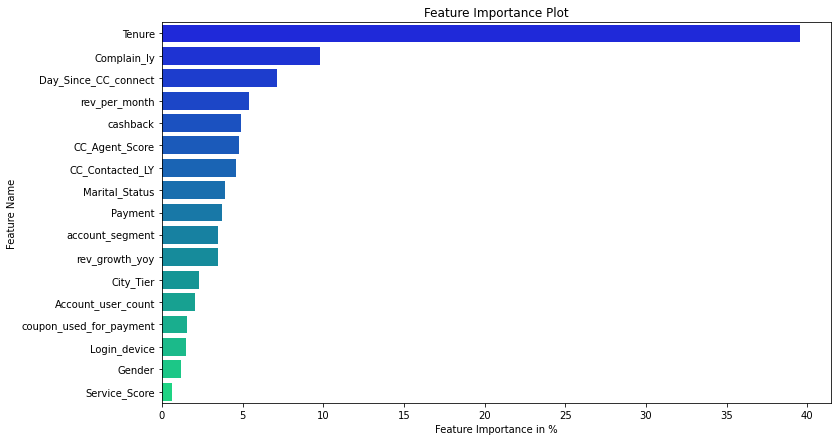

In [325]:
x=pd.DataFrame(best_grid_rfcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='winter')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()


## Predicting the Training and Testing data

In [664]:
rfcl_ytrain_predict = best_grid_rfcl.predict(X_train)
rfcl_ytest_predict = best_grid_rfcl.predict(X_test)

In [665]:
#Train Data Accuracy
rfcl_train_acc=best_grid_rfcl.score(X_train,Y_train) 
rfcl_train_acc

0.9459459459459459

In [666]:
#Test Data Accuracy
rfcl_test_acc=best_grid_rfcl.score(X_test,Y_test) 
rfcl_test_acc

0.926605504587156

Area under Curve is 0.986504493248335


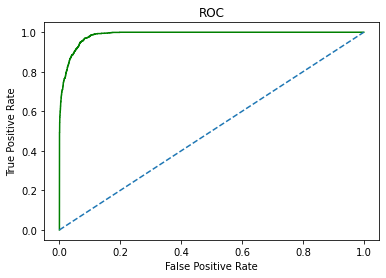

In [667]:
rf_train_fpr, rf_train_tpr,_=roc_curve(Y_train,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(Y_train,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

Area under Curve is 0.9634358234496886


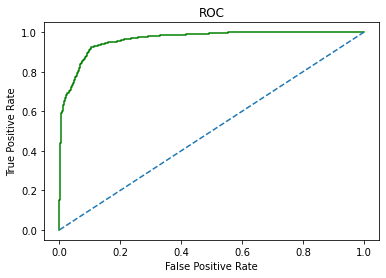

In [668]:
rf_train_fpr, rf_train_tpr,_=roc_curve(Y_test,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(Y_test,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_train_auc)

In [669]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,rfcl_ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,rfcl_ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      6555
         1.0       0.92      0.74      0.82      1326

    accuracy                           0.95      7881
   macro avg       0.94      0.86      0.90      7881
weighted avg       0.95      0.95      0.94      7881
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      2809
         1.0       0.88      0.65      0.75       570

    accuracy                           0.93      3379
   macro avg       0.91      0.82      0.85      3379
weighted avg       0.92      0.93      0.92      3379
 



## Confusion Matrix for train and test data

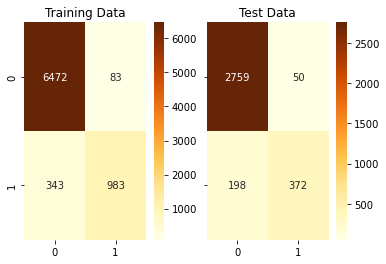

In [671]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,rfcl_ytrain_predict)),annot=True,fmt='.5g',cmap='YlOrBr',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,rfcl_ytest_predict)),annot=True,fmt='.5g',cmap='YlOrBr',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [672]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.395236
Complain_ly              0.098035
Day_Since_CC_connect     0.071361
rev_per_month            0.053763
cashback                 0.049160
CC_Agent_Score           0.047580
CC_Contacted_LY          0.046013
Marital_Status           0.039083
Payment                  0.037042
account_segment          0.035082
rev_growth_yoy           0.034871
City_Tier                0.023310
Account_user_count       0.020857
coupon_used_for_payment  0.015727
Login_device             0.015036
Gender                   0.011645
Service_Score            0.006199


# Random Forest using smote

In [673]:
param_grid1 = {
    'max_depth': [10,20],
    'max_features': [6,7,8],
    'min_samples_leaf': [10,20],
    'min_samples_split': [15,20],
    'n_estimators': [100, 150] 
}

rfcl2 = RandomForestClassifier(random_state=1)

grid_search2 = GridSearchCV(estimator = rfcl2, param_grid = param_grid1, cv = 5)

In [674]:
grid_search.fit(X_train_smote,Y_train_smote)
print(grid_search.best_params_)
Smote_RFCL = grid_search.best_estimator_
Smote_RFCL

{'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 150}


RandomForestClassifier(max_depth=20, max_features=8, min_samples_leaf=10,
                       min_samples_split=15, n_estimators=150, random_state=1)

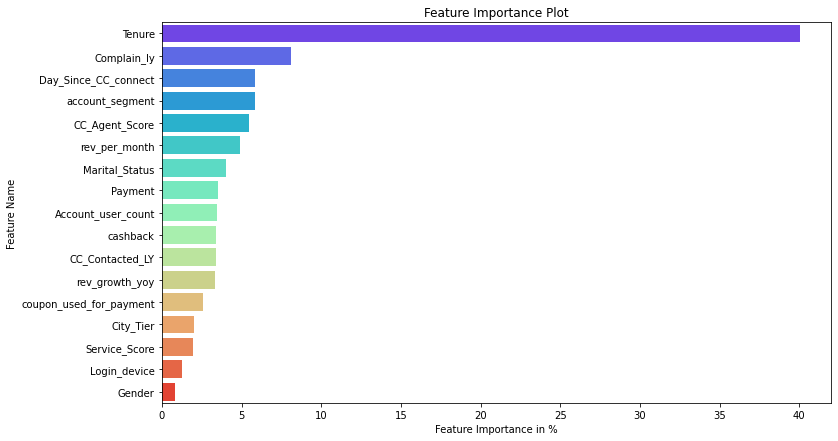

In [677]:
x=pd.DataFrame(Smote_RFCL.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()


In [679]:
Smote_RFCL_ytrain_predict = Smote_RFCL.predict(X_train_smote)
Smote_RFCL_ytest_predict = Smote_RFCL.predict(X_test)

In [680]:
#Train Data Accuracy
Smote_RFCL_train_acc=Smote_RFCL.score(X_train_smote,Y_train_smote) 
Smote_RFCL_train_acc

0.9714721586575134

In [682]:
#Train Data Accuracy
Smote_RFCL_test_acc=Smote_RFCL.score(X_test,Y_test)

In [683]:
print(classification_report(Y_train_smote,Smote_RFCL_ytrain_predict))
print(classification_report(Y_test,Smote_RFCL_ytest_predict ))



              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      6555
         1.0       0.96      0.98      0.97      6555

    accuracy                           0.97     13110
   macro avg       0.97      0.97      0.97     13110
weighted avg       0.97      0.97      0.97     13110

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96      2809
         1.0       0.75      0.84      0.80       570

    accuracy                           0.93      3379
   macro avg       0.86      0.89      0.88      3379
weighted avg       0.93      0.93      0.93      3379



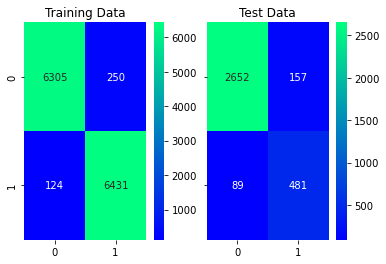

In [688]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train_smote,Smote_RFCL_ytrain_predict)),annot=True,fmt='.5g',cmap='winter',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,Smote_RFCL_ytest_predict)),annot=True,fmt='.5g',cmap='winter',ax=a[0][1]);
a[0][1].set_title('Test Data');


## AUC and ROC of training data

AUC: 0.997


Text(0.5, 1.0, 'ROC of training data RFCL using smote')

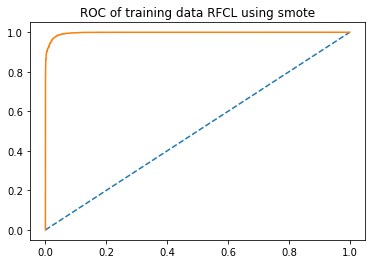

In [689]:
# predict probabilities
probs =Smote_RFCL.predict_proba(X_train_smote)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train_smote, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_RFCL_train_fpr,Smote_RFCL_train_tpr, train_thresholds = roc_curve(Y_train_smote, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_RFCL_train_fpr,Smote_RFCL_train_tpr);
plt.title('ROC of training data RFCL using smote')


AUC: 0.969


Text(0.5, 1.0, 'ROC of testing data RFCL using smote')

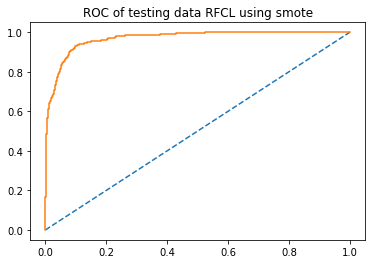

In [690]:
# predict probabilities
probs =Smote_RFCL.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_RFCL_test_fpr,Smote_RFCL_test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_RFCL_test_fpr,Smote_RFCL_test_tpr);
plt.title('ROC of testing data RFCL using smote')


# Building a KNN Model

In [691]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [692]:
# empty list that will hold accuracy scores
ac_scores = []
# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, Y_test)
    ac_scores.append(scores)
# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.02633915359573835,
 0.03876886652855871,
 0.03403373779224628,
 0.04764723290914474,
 0.045279668540988416,
 0.0633323468481799,
 0.059781000295945574,
 0.07605800532701978,
 0.07102693104468782,
 0.09322284699615269,
 0.08996744598993789,
 0.10417283219887541,
 0.10180526783071919,
 0.11038768866528559,
 0.10890796093518795,
 0.11512281740159813,
 0.11216336194140275,
 0.12311334714412547,
 0.11985794613791068]

## OPTIMAL KNN

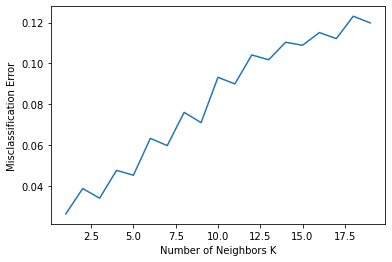

In [736]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,1), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [737]:
# From this graph the optimal value of k comes out to be 2

In [693]:
Best_knn=KNeighborsClassifier(n_neighbors=2)
Best_knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

In [694]:
Best_knn_ytrain_predict = Best_knn.predict(X_train)
Best_knn_ytest_predict= Best_knn.predict(X_test)

In [702]:
#Train Data Accuracy
Best_knn_train_acc=Best_knn.score(X_train,Y_train) 
print("Best_knn_train_acc:", Best_knn_train_acc)

Best_knn_train_acc: 0.9851541682527598


In [703]:
#Train Data Accuracy
Best_knn_test_acc=Best_knn.score(X_test,Y_test) 
print("Best_knn_test_acc:", Best_knn_test_acc)

Best_knn_test_acc: 0.9612311334714413


In [697]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,Best_knn_ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,Best_knn_ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6555
         1.0       1.00      0.91      0.95      1326

    accuracy                           0.99      7881
   macro avg       0.99      0.96      0.97      7881
weighted avg       0.99      0.99      0.98      7881
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2809
         1.0       0.97      0.80      0.87       570

    accuracy                           0.96      3379
   macro avg       0.96      0.90      0.93      3379
weighted avg       0.96      0.96      0.96      3379
 



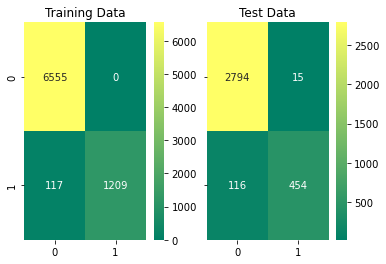

In [698]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,Best_knn_ytrain_predict)),annot=True,fmt='.5g',cmap='summer',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,Best_knn_ytest_predict)),annot=True,fmt='.5g',cmap='summer',ax=a[0][1]);
a[0][1].set_title('Test Data');

### AUC and ROC for the training data 

AUC for KNN Train Data: 0.999


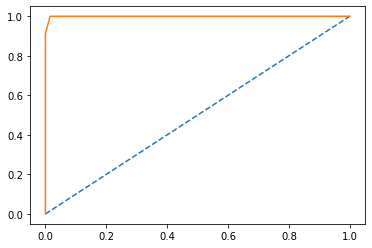

In [699]:
# predict probabilities
probs_KNN_tr = Best_knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_KNN_tr = probs_KNN_tr[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(Y_train,probs_KNN_tr)
print('AUC for KNN Train Data: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(Y_train, probs_KNN_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr);

### AUC and ROC for the testing data

AUC for KNN Train Data: 0.966


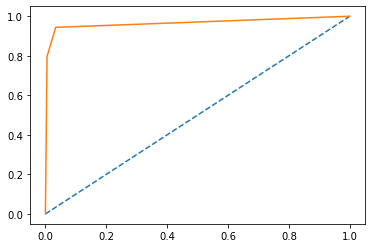

In [700]:
# predict probabilities
probs_KNN_test = Best_knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_KNN_test = probs_KNN_test[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(Y_test,probs_KNN_test)
print('AUC for KNN Train Data: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(Y_test,probs_KNN_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr);

## KNN with Smote

In [704]:
from sklearn.neighbors import KNeighborsClassifier
Smote_KNN_model=KNeighborsClassifier()
Smote_KNN_model.fit(X_train_smote,Y_train_smote)


KNeighborsClassifier()

In [705]:
# empty list that will hold accuracy scores
ac_scores = []
# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote,Y_train_smote)
    # evaluate test accuracy
    scores = knn.score(X_test, Y_test)
    ac_scores.append(scores)
# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE



[0.025155371411660243,
 0.024267534773601662,
 0.040248594258656456,
 0.0375850843444806,
 0.06214856466410179,
 0.0580053270198283,
 0.08138502515537138,
 0.0751701686889612,
 0.09914175791654334,
 0.0923350103580941,
 0.11630659958567624,
 0.10683634211305115,
 0.1319917135247115,
 0.12429712932820358,
 0.14886060964782477,
 0.14027818881325838,
 0.16010654039656702,
 0.15004439183190288,
 0.1716484166913288]

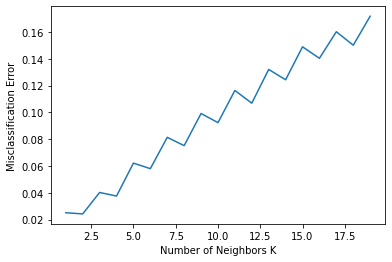

In [706]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,1), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [707]:
Smote_Best_knn=KNeighborsClassifier(n_neighbors=2)
Smote_Best_knn.fit(X_train_smote,Y_train_smote)

Smote_knn_ytrain_predict = Best_knn.predict(X_train_smote)
Smote_knn_ytest_predict= Best_knn.predict(X_test)


In [708]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of Smote_Best_knn training dataset:",Smote_Best_knn.score(X_train_smote,Y_train_smote))

#Accuracy - testing Data
print("Accuracy of Smote_Best_knn testing dataset:",Smote_Best_knn.score(X_test, Y_test))


Accuracy of Smote_Best_knn training dataset: 0.9996186117467581
Accuracy of Smote_Best_knn testing dataset: 0.9757324652263983


In [709]:
print(classification_report(Y_train_smote,Smote_knn_ytrain_predict))
print(classification_report(Y_test,Smote_knn_ytest_predict ))



              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      6555
         1.0       1.00      0.94      0.97      6555

    accuracy                           0.97     13110
   macro avg       0.97      0.97      0.97     13110
weighted avg       0.97      0.97      0.97     13110

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2809
         1.0       0.97      0.80      0.87       570

    accuracy                           0.96      3379
   macro avg       0.96      0.90      0.93      3379
weighted avg       0.96      0.96      0.96      3379



## Confusion Matrix of Smote KNN

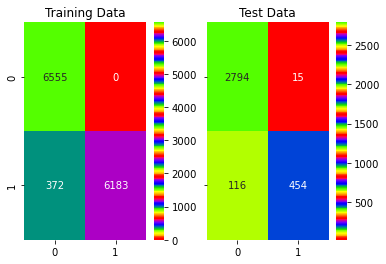

In [710]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train_smote,Smote_knn_ytrain_predict)),annot=True,fmt='.5g',cmap='prism',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,Smote_knn_ytest_predict)),annot=True,fmt='.5g',cmap='prism',ax=a[0][1]);
a[0][1].set_title('Test Data');


## AUC and ROC for training and testing data for KNN smote

AUC: 1.000


Text(0.5, 1.0, 'ROC of training data KNN with smote')

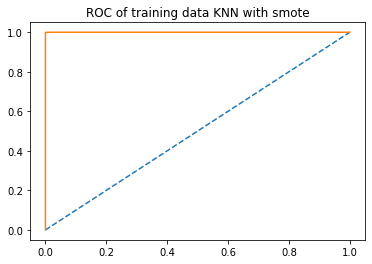

In [711]:
# predict probabilities
probs =Smote_Best_knn.predict_proba(X_train_smote)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train_smote, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_Best_knn_train_fpr, Smote_Best_knn_train_tpr, Smote_Best_knn_train_thresholds = roc_curve(Y_train_smote, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_Best_knn_train_fpr,Smote_Best_knn_train_tpr);
plt.title('ROC of training data KNN with smote')

AUC: 0.970


Text(0.5, 1.0, 'ROC of testing data KNN with smote')

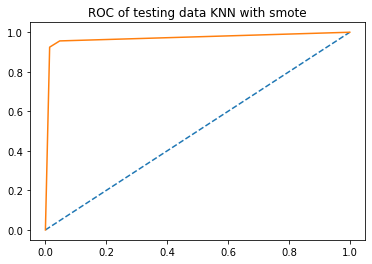

In [712]:
# predict probabilities
probs =Smote_Best_knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_Best_knn_test_fpr, Smote_Best_knn_test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_Best_knn_test_fpr,Smote_Best_knn_test_tpr);
plt.title('ROC of testing data KNN with smote')


# BAGGING

In [724]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, Y_train)

In [725]:
Bag_y_train_predict = bgcl.predict(X_train)
Bag_y_test_predict = bgcl.predict(X_test)

In [726]:
Bag_model_train_score =bgcl.score(X_train, Y_train)
Bag_test_model_score =bgcl.score(X_test, Y_test)
Bag_model_train_score


1.0

In [727]:
Bag_test_model_score

0.9662622077537734

In [728]:

print(metrics.classification_report(Y_train,Bag_y_train_predict))

print(metrics.classification_report(Y_test,Bag_y_test_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6555
         1.0       1.00      1.00      1.00      1326

    accuracy                           1.00      7881
   macro avg       1.00      1.00      1.00      7881
weighted avg       1.00      1.00      1.00      7881

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2809
         1.0       0.95      0.84      0.89       570

    accuracy                           0.97      3379
   macro avg       0.96      0.92      0.94      3379
weighted avg       0.97      0.97      0.97      3379



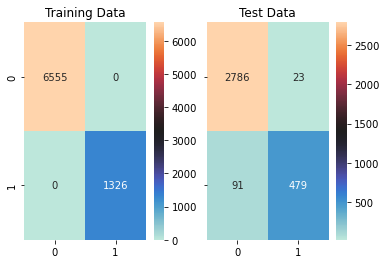

In [729]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,Bag_y_train_predict)),annot=True,fmt='.5g',cmap='icefire',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,Bag_y_test_predict)),annot=True,fmt='.5g',cmap='icefire',ax=a[0][1]);
a[0][1].set_title('Test Data');

### AUC AND ROC CURVE

AUC: 1.000


Text(0.5, 1.0, 'ROC of training data of Bagging ')

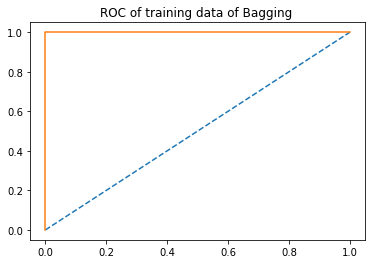

In [730]:
#AUC and ROC for the training data
# predict probabilities
probs_bgcl = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_bgcl = probs_bgcl[:, 1]
# calculate AUC
auc_lor_train = roc_auc_score(Y_train,probs_bgcl)
print('AUC: %.3f' % auc_lor_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train,probs_bgcl)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title('ROC of training data of Bagging ')

AUC: 0.984


Text(0.5, 1.0, 'ROC of testing data of Bagging')

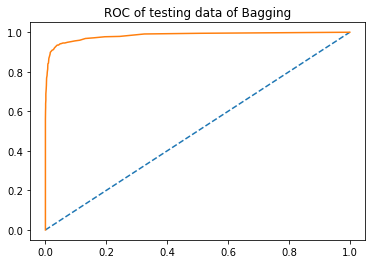

In [732]:
#AUC and ROC for the test data
# predict probabilities
probs_test_bgcl =  bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test_bgcl = probs_test_bgcl[:, 1]
# calculate AUC
auc_lor_test = roc_auc_score(Y_test, probs_test_bgcl)
print('AUC: %.3f' % auc_lor_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test,probs_test_bgcl)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.title('ROC of testing data of Bagging')

# Bagging with SMOTE

In [733]:
from sklearn.ensemble import BaggingClassifier

Smote_bgcl = BaggingClassifier(n_estimators=50,random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

Smote_bgcl =Smote_bgcl.fit(X_train_smote, Y_train_smote)

In [734]:
Smote_bag_ytrainpredict = Smote_bgcl.predict(X_train_smote)

In [735]:
Smote_bag_ytestpredict = Smote_bgcl.predict(X_test)

In [736]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",Smote_bgcl.score(X_train_smote,Y_train_smote))

#Accuracy - testing Data
print("Accuracy of testing dataset:",Smote_bgcl.score(X_test, Y_test))


Accuracy of training dataset: 1.0
Accuracy of testing dataset: 0.9612311334714413


In [737]:
print(classification_report(Y_train_smote,Smote_bag_ytrainpredict))
print(classification_report(Y_test,Smote_bag_ytestpredict))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6555
         1.0       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2809
         1.0       0.87      0.90      0.89       570

    accuracy                           0.96      3379
   macro avg       0.93      0.94      0.93      3379
weighted avg       0.96      0.96      0.96      3379



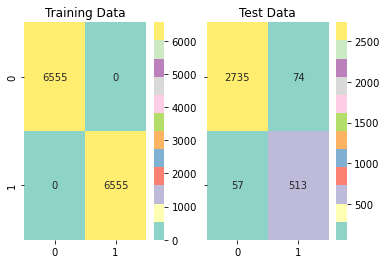

In [738]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train_smote,Smote_bag_ytrainpredict)),annot=True,fmt='.5g',cmap='Set3',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,Smote_bag_ytestpredict)),annot=True,fmt='.5g',cmap='Set3',ax=a[0][1]);
a[0][1].set_title('Test Data');


AUC: 1.000


Text(0.5, 1.0, 'ROC of training data of bagging with smote')

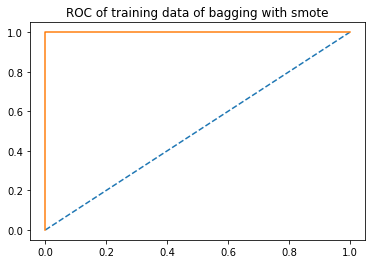

In [739]:
# predict probabilities
probs =Smote_bgcl.predict_proba(X_train_smote)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train_smote, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_bgcl_train_fpr,Smote_bgcl_train_tpr, train_thresholds = roc_curve(Y_train_smote, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_bgcl_train_fpr,Smote_bgcl_train_tpr);
plt.title('ROC of training data of bagging with smote')


AUC: 0.985


Text(0.5, 1.0, 'ROC of testing data of bagging with smote')

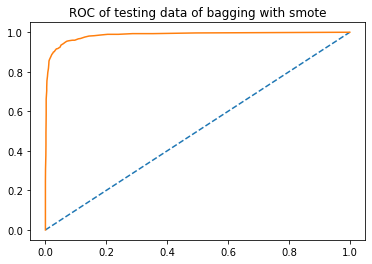

In [740]:
# predict probabilities
probs =Smote_bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_bgcl_test_fpr,Smote_bgcl_test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_bgcl_test_fpr,Smote_bgcl_test_tpr);
plt.title('ROC of testing data of bagging with smote')


# ADABOOSTING MODEL

In [741]:
from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(X_train,Y_train)


AdaBoostClassifier(n_estimators=100)

In [742]:
ADB_ytrain_predict= clfADB.predict(X_train)
ADB_ytest_predict = clfADB.predict(X_test)

In [743]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,ADB_ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,ADB_ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      6555
         1.0       0.77      0.60      0.68      1326

    accuracy                           0.90      7881
   macro avg       0.85      0.78      0.81      7881
weighted avg       0.90      0.90      0.90      7881
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2809
         1.0       0.76      0.58      0.66       570

    accuracy                           0.90      3379
   macro avg       0.84      0.77      0.80      3379
weighted avg       0.89      0.90      0.89      3379
 



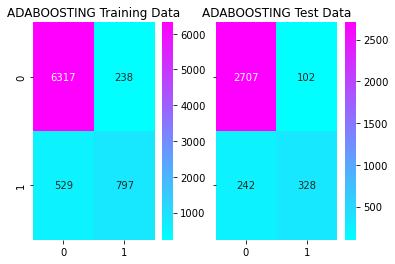

In [744]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,ADB_ytrain_predict)),annot=True,fmt='.5g',cmap='cool',ax=a[0][0]);
a[0][0].set_title('ADABOOSTING Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,ADB_ytest_predict)),annot=True,fmt='.5g',cmap='cool',ax=a[0][1]);
a[0][1].set_title('ADABOOSTING Test Data');

### AUC and ROC for the training and test data of AdaBoosting Model

AUC for AdaBoosting Train Data: 0.923


Text(0.5, 1.0, 'ROC of training data of Adaboosting')

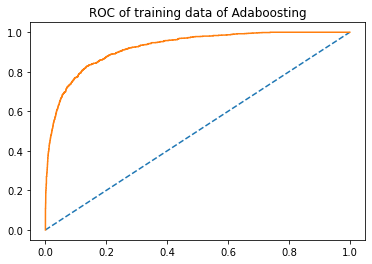

In [745]:
# predict probabilities
probs_adb_tr = clfADB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_adb_tr = probs_adb_tr[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(Y_train, probs_adb_tr)
print('AUC for AdaBoosting Train Data: %.3f' % adb_train_auc)
# calculate roc curve
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(Y_train, probs_adb_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_train_fpr, adb_train_tpr);
plt.title('ROC of training data of Adaboosting')

AUC for AdaBoosting Test Data: 0.912


Text(0.5, 1.0, 'ROC of testing data of Adaboosting')

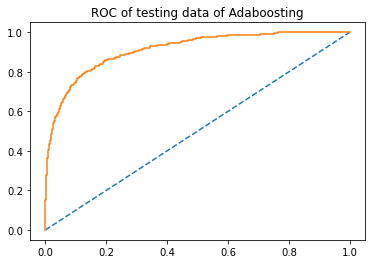

In [747]:
# predict probabilities
probs_adb_test = clfADB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_adb_test = probs_adb_test[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(Y_test, probs_adb_test)
print('AUC for AdaBoosting Test Data: %.3f' % adb_test_auc)
# calculate roc curve
adb_test_fpr, adb_test_tpr, adb_test_thresholds = roc_curve(Y_test, probs_adb_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_test_fpr, adb_test_tpr);
plt.title('ROC of testing data of Adaboosting')

In [748]:
print (pd.DataFrame(clfADB.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                          Imp
cashback                 0.23
Tenure                   0.20
Day_Since_CC_connect     0.13
rev_per_month            0.07
rev_growth_yoy           0.06
account_segment          0.06
CC_Contacted_LY          0.04
Account_user_count       0.04
Marital_Status           0.03
CC_Agent_Score           0.03
City_Tier                0.02
Complain_ly              0.02
Service_Score            0.02
Payment                  0.02
coupon_used_for_payment  0.01
Gender                   0.01
Login_device             0.01


## Adaboosting with Smote

In [749]:
Smote_adb = AdaBoostClassifier(n_estimators=100,random_state=1,learning_rate=0.001)
Smote_adb.fit(X_train_smote,Y_train_smote)

AdaBoostClassifier(learning_rate=0.001, n_estimators=100, random_state=1)

In [750]:
Smote_adb_ytrain_predict= Smote_adb.predict(X_train_smote)
Smote_adb_ytest_predict= Smote_adb.predict(X_test)

In [751]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",Smote_adb.score(X_train_smote,Y_train_smote))

#Accuracy - testing Data
print("Accuracy of testing dataset:",Smote_adb.score(X_test, Y_test))



Accuracy of training dataset: 0.7830663615560641
Accuracy of testing dataset: 0.8490677715300384


In [752]:
print(classification_report(Y_train_smote,Smote_adb_ytrain_predict))
print(classification_report(Y_test,Smote_adb_ytest_predict))


              precision    recall  f1-score   support

         0.0       0.74      0.86      0.80      6555
         1.0       0.84      0.70      0.76      6555

    accuracy                           0.78     13110
   macro avg       0.79      0.78      0.78     13110
weighted avg       0.79      0.78      0.78     13110

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      2809
         1.0       0.54      0.71      0.61       570

    accuracy                           0.85      3379
   macro avg       0.74      0.80      0.76      3379
weighted avg       0.87      0.85      0.86      3379



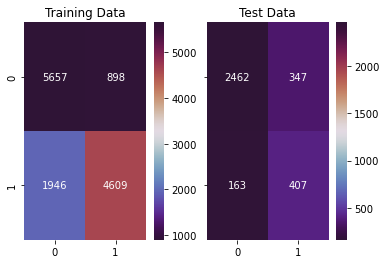

In [755]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train_smote,Smote_adb_ytrain_predict)),annot=True,fmt='.5g',cmap='twilight_shifted',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,Smote_adb_ytest_predict)),annot=True,fmt='.5g',cmap='twilight_shifted',ax=a[0][1]);
a[0][1].set_title('Test Data');


AUC: 0.783


Text(0.5, 1.0, 'ROC of training data of Adaboosting with smote')

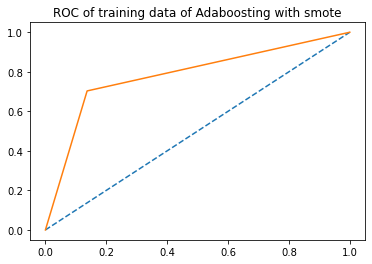

In [759]:
# predict probabilities
probs =Smote_adb.predict_proba(X_train_smote)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train_smote, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_adb_train_fpr, Smote_adb_train_tpr, train_thresholds = roc_curve(Y_train_smote, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_adb_train_fpr,Smote_adb_train_tpr);
plt.title('ROC of training data of Adaboosting with smote')



AUC: 0.795


Text(0.5, 1.0, 'ROC of testing Adaboosting with Smote')

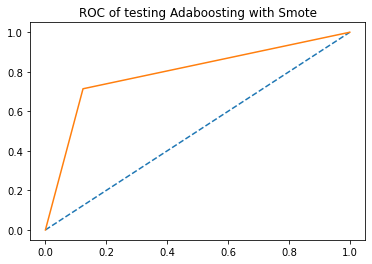

In [761]:
# predict probabilities
probs =Smote_adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
Smote_adb_test_fpr, Smote_adb_test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Smote_adb_test_fpr,Smote_adb_test_tpr);
plt.title('ROC of testing Adaboosting with Smote')


# Gradient Boosting Model

In [762]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, Y_train)

In [763]:
gbcl_ytrain_predict = gbcl.predict(X_train)
gbcl_ytest_predict = gbcl.predict(X_test)

In [764]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,gbcl_ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,gbcl_ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      6555
         1.0       0.82      0.58      0.68      1326

    accuracy                           0.91      7881
   macro avg       0.87      0.78      0.81      7881
weighted avg       0.90      0.91      0.90      7881
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      2809
         1.0       0.81      0.58      0.67       570

    accuracy                           0.91      3379
   macro avg       0.86      0.77      0.81      3379
weighted avg       0.90      0.91      0.90      3379
 



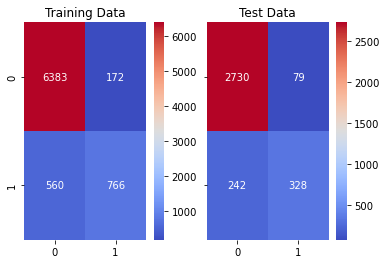

In [765]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,gbcl_ytrain_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,gbcl_ytest_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');

### AUC and ROC for the training and test data of GradientBoosting Model

AUC for GradientBoosting Train Data: 0.932


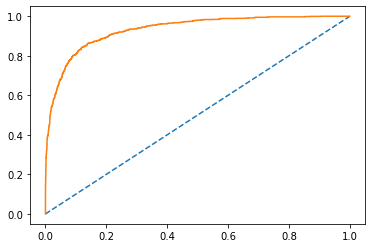

In [766]:
# predict probabilities
probs_gbcl_tr = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_gbcl_tr = probs_gbcl_tr[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(Y_train, probs_gbcl_tr)
print('AUC for GradientBoosting Train Data: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(Y_train, probs_gbcl_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr);

AUC for GradientBoosting Test Data: 0.915


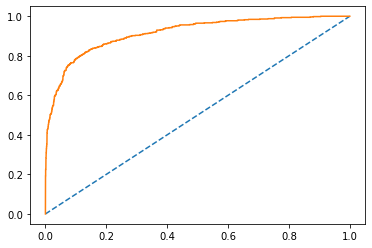

In [768]:
# predict probabilities
probs_gbcl_test = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_gbcl_test = probs_gbcl_test[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(Y_test, probs_gbcl_test)
print('AUC for GradientBoosting Test Data: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = roc_curve(Y_test, probs_gbcl_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr);

# Gradient Boosting Model with Smote

In [769]:

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
smote_gbcl = gbcl.fit(X_train_smote, Y_train_smote)

In [770]:
gbcl_ytrain_predict = smote_gbcl.predict(X_train_smote)
gbcl_ytest_predict = smote_gbcl.predict(X_test)

In [771]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",smote_gbcl.score(X_train_smote,Y_train_smote))

#Accuracy - testing Data
print("Accuracy of testing dataset:",smote_gbcl.score(X_test, Y_test))


Accuracy of training dataset: 0.8998474446987033
Accuracy of testing dataset: 0.8833974548683042


In [772]:
print(classification_report(Y_train_smote,gbcl_ytrain_predict))
print(classification_report(Y_test,gbcl_ytest_predict ))


              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      6555
         1.0       0.91      0.89      0.90      6555

    accuracy                           0.90     13110
   macro avg       0.90      0.90      0.90     13110
weighted avg       0.90      0.90      0.90     13110

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      2809
         1.0       0.63      0.76      0.69       570

    accuracy                           0.88      3379
   macro avg       0.79      0.83      0.81      3379
weighted avg       0.89      0.88      0.89      3379



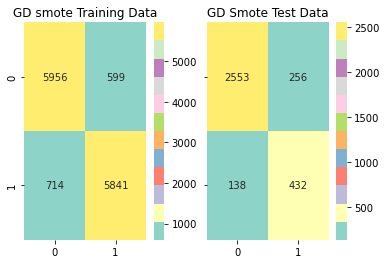

In [773]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train_smote,gbcl_ytrain_predict)),annot=True,fmt='.5g',cmap='Set3',ax=a[0][0]);
a[0][0].set_title('GD smote Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,gbcl_ytest_predict)),annot=True,fmt='.5g',cmap='Set3',ax=a[0][1]);
a[0][1].set_title('GD Smote Test Data');


AUC: 0.962


Text(0.5, 1.0, 'ROC of training data Gradient boosting with smote')

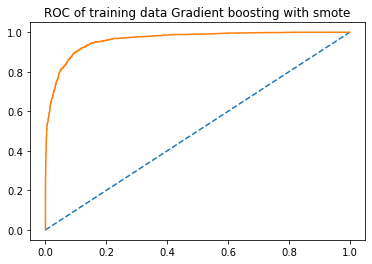

In [775]:
# predict probabilities
probs =smote_gbcl.predict_proba(X_train_smote)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train_smote, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
smote_gbcl_train_fpr, smote_gbcl_train_tpr, train_thresholds = roc_curve(Y_train_smote, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(smote_gbcl_train_fpr,smote_gbcl_train_tpr);
plt.title('ROC of training data Gradient boosting with smote')


AUC: 0.906


Text(0.5, 1.0, 'ROC of testing data Gradient boosting with smote')

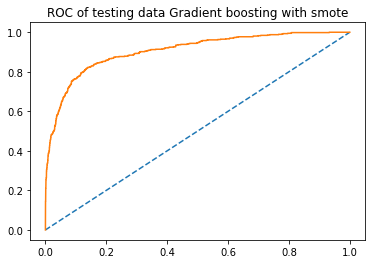

In [795]:
# predict probabilities
probs =smote_gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
smote_gbcl_test_fpr, smote_gbcl_test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(smote_gbcl_test_fpr,smote_gbcl_test_tpr);
plt.title('ROC of testing data Gradient boosting with smote')

